# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [1]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

## Data exploration and pre-processing
Now, we load the dataset from the .csv file provided.

In [2]:
# Load the dataset
df = pd.read_csv("ddos_dataset.csv", header=0, index_col=0, engine='python')

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

df


Flow ID     Source IP  Source Port  \
0        172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5          634   
1        172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1          634   
2        172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5          634   
3        172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5          634   
4        172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5          634   
...                                       ...           ...          ...   
65995  172.16.0.5-192.168.50.1-38625-63051-17    172.16.0.5        38625   
65996  172.16.0.5-192.168.50.1-58632-18963-17    172.16.0.5        58632   
65997  172.16.0.5-192.168.50.1-46104-64704-17    172.16.0.5        46104   
65998  172.16.0.5-192.168.50.1-60686-10440-17    172.16.0.5        60686   
65999   172.16.0.5-192.168.50.1-45602-1387-17    172.16.0.5        45602   

      Destination IP  Destination Port  Protocol                   Timestamp  \
0       192.168.50.1             60495        17  2018-12-01 10:51:39.813448   
1         172.16.0.5             60495        17  2018-12-01 10:51:39.820842   
2       192.168.50.1             46391        17  2018-12-01 10:51:39.852499   
3       192.168.50.1             11894        17  2018-12-01 10:51:39.890213   
4       192.168.50.1             27878        17  2018-12-01 10:51:39.941151   
...              ...               ...       ...                         ...   
65995   192.168.50.1             63051        17  2018-12-01 13:04:46.628249   
65996   192.168.50.1             18963        17  2018-12-01 13:04:46.628963   
65997   192.168.50.1             64704        17  2018-12-01 13:04:46.629014   
65998   192.168.50.1             10440        17  2018-12-01 13:04:46.629016   
65999   192.168.50.1              1387        17  2018-12-01 13:04:46.629300   

       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              28415                 97                       0   
1                  2                  2                       0   
2              48549                200                       0   
3              48337                200                       0   
4              32026                200                       0   
...              ...                ...                     ...   
65995              1                  2                       0   
65996         212238                  6                       0   
65997              1                  2                       0   
65998         108952                  4                       0   
65999              1                  2                       0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          42680.0                          0.0   
1                            880.0                          0.0   
2                          88000.0                          0.0   
3                          88000.0                          0.0   
4                          88000.0                          0.0   
...                            ...                          ...   
65995                        750.0                          0.0   
65996                       2088.0                          0.0   
65997                        750.0                          0.0   
65998                       1438.0                          0.0   
65999                        750.0                          0.0   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      440.0                  440.0                   440.0   
1                      440.0                  440.0                   440.0   
2                      440.0                  440.0                   440.0   
3                      440.0                  440.0                   440.0   
4                      440.0                  440.0                   440.0   
...                      ...                    ...                     ...   
6

### Removing inconsistent features
From the previous visualization analysis, we discovered that some features are inconsistent, duplicated or don't bring any further information (since they are always 0), so, as first preprocessing step, we drop them. At the end, we removed 20 features.

In [3]:
columns_to_delete = ['Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Header Length.1', 'min_seg_size_forward', 'Fwd Avg Bytes/Bulk',  'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',  'Bwd Avg Packets/Bulk',  'Bwd Avg Bulk Rate', 'PSH Flag Count', 'FIN Flag Count', 'ECE Flag Count', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags']
print(f"Removed features: {columns_to_delete}")
df_cleaned = df.drop(columns_to_delete, axis=1)

df_cleaned.describe()

Removed features: ['Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Header Length.1', 'min_seg_size_forward', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'PSH Flag Count', 'FIN Flag Count', 'ECE Flag Count', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags']


Source Port  Destination Port      Protocol  Flow Duration  \
count  64239.000000      64239.000000  64239.000000   6.423900e+04   
mean   25267.368608      30715.252884     14.362864   5.150614e+06   
std    24710.413442      20347.990914      4.706001   2.249713e+07   
min        0.000000          0.000000      0.000000   1.000000e+00   
25%      779.000000      12435.500000     17.000000   1.000000e+00   
50%    29661.000000      30797.000000     17.000000   2.000000e+00   
75%    48510.500000      49041.500000     17.000000   2.087700e+04   
max    65518.000000      65535.000000     17.000000   1.200000e+08   

       Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
count       64239.000000            64239.000000                 64239.000000   
mean           18.814848                1.304036                  6699.521630   
std           462.305336               25.199720                 20510.320389   
min             1.000000                0.000000                     0.000000   
25%             2.000000                0.000000                   123.000000   
50%             2.000000                0.000000                  1050.000000   
75%             2.000000                0.000000                  2944.000000   
max         85894.000000             1862.000000                176000.000000   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 6.423900e+04           64239.000000   
mean                  2.153348e+03             613.992948   
std                   9.087201e+04             585.691655   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00              53.000000   
50%                   0.000000e+00             393.000000   
75%                   0.000000e+00            1464.000000   
max                   8.829488e+06            3564.000000   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count           64239.000000            64239.000000           64239.000000   
mean              588.863043              597.433678               8.712070   
std               584.276284              579.518758              50.570586   
min                 0.000000                0.000000               0.000000   
25%                36.000000               50.000000               0.000000   
50%               375.000000              383.000000               0.000000   
75%              1464.000000             1464.000000               0.000000   
max              2020.000000             2666.086957            1248.198581   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
count           64239.000000           64239.000000            64239.000000   
mean               52.149364               3.745248               13.857476   
std               749.318027              25.606835              117.139480   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                 0.000000               0.000000                0.000000   
75%                 0.000000               0.000000                0.000000   
max             37960.000000            1460.000000             5011.060159   

       Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
count           64239.000000  6.423900e+04    6.423900e+04   6.423900e+04   
mean               13.263569  7.634940e+08    1.039858e+06   3.657561e+05   
std               136.314368  9.955216e+08    9.012285e+05   1.556677e+06   
min                 0.000000  0.000000e+00    5.262150e-02   5.000000e-01   
25%                 0.000000  9.610494e+03    5.257900e+03   1.000000e+00   
50%                 0.000000  3.830000e+08    1.000000e+06   2.000000e+00   
75%                 0.000000  1.364500e+09    2.000000e+06   2.000477e+02   
max              7045.095260  2.944000e+09    3.000000e+0

## Feature Transformation
Correlation analysis, PCA, machine learning models... need to work with numerical features. Hence, IPs cannot be treated as they are and performing an encoding may not be really useful since we have many of them. We decided to transform them in their binary representation. For what concerns the timestamp, we tried to transform it into seconds. Then, training the models, we found that it improves significantly the performances, but we decided to remove it since it is a parameter that wouldn't allow us to discern future attacks. Finally, we drop the flow id (the model cannot learn anything from it + it contains info already present in the datset) and the last categorical feature remained: the SimilarHTTP: since the 99% of values is 0, it does not bring any important information (and it does not make sense use an encoding, as we should create a lot of new columns for just one sample).

In [4]:
def to_binary(ip):
    parts = ip.split('.')
    return (int(parts[0]) << 24) + (int(parts[1]) << 16) + (int(parts[2]) << 8) + int(parts[3])

df_cleaned['Source IP'] = df_cleaned['Source IP'].apply(to_binary)
df_cleaned['Destination IP'] = df_cleaned['Destination IP'].apply(to_binary)
df_cleaned = df_cleaned.drop(['Flow ID', 'SimillarHTTP', 'Timestamp'], axis=1)

df_cleaned

Source IP  Source Port  Destination IP  Destination Port  Protocol  \
0      2886729733          634      3232248321             60495        17   
1      3232248321          634      2886729733             60495        17   
2      2886729733          634      3232248321             46391        17   
3      2886729733          634      3232248321             11894        17   
4      2886729733          634      3232248321             27878        17   
...           ...          ...             ...               ...       ...   
65995  2886729733        38625      3232248321             63051        17   
65996  2886729733        58632      3232248321             18963        17   
65997  2886729733        46104      3232248321             64704        17   
65998  2886729733        60686      3232248321             10440        17   
65999  2886729733        45602      3232248321              1387        17   

       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              28415                 97                       0   
1                  2                  2                       0   
2              48549                200                       0   
3              48337                200                       0   
4              32026                200                       0   
...              ...                ...                     ...   
65995              1                  2                       0   
65996         212238                  6                       0   
65997              1                  2                       0   
65998         108952                  4                       0   
65999              1                  2                       0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          42680.0                          0.0   
1                            880.0                          0.0   
2                          88000.0                          0.0   
3                          88000.0                          0.0   
4                          88000.0                          0.0   
...                            ...                          ...   
65995                        750.0                          0.0   
65996                       2088.0                          0.0   
65997                        750.0                          0.0   
65998                       1438.0                          0.0   
65999                        750.0                          0.0   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      440.0                  440.0                   440.0   
1                      440.0                  440.0                   440.0   
2                      440.0                  440.0                   440.0   
3                      440.0                  440.0                   440.0   
4                      440.0                  440.0                   440.0   
...                      ...                    ...                     ...   
65995                  375.0                  375.0                   375.0   
65996                  393.0                  321.0                   348.0   
65997                  375.0                  375.0                   375.0   
65998                  389.0                  330.0                   359.5   
65999                  375.0                  375.0                   375.0   

       Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
0                   0.000000                    0.0                    0.0   
1                   0.000000                    0.0                    0.0   
2                   0.000000                    0.0                    0.0   
3                   0.000000                    0.0                    0.0   
4                   0.000000                    0.0                    0.0   
...                      ...                

### Label encoding
Use One-Hot Encoding for supervised multiclass classification, since supervised machine learning models cannot directly interpret categorical features.

Here we apply one-hot encoding for the 'Protocol' feature.

In [5]:
# One-Hot Encoding for the 'Protocol' column
encoded_protocols = pd.get_dummies(df_cleaned['Protocol'], prefix='protocol')    # transform each unique value of the label column into a separate binary column
encoded_protocols = encoded_protocols.astype(int)       # convert the bolean values ​​(True/False) of the generated columns to integers (0/1)
df_cleaned = pd.concat([df_cleaned, encoded_protocols], axis=1)       # add the new binary columns to the original dataframe
df_cleaned.drop(columns=['Protocol'], inplace=True)        # remove the original column, as it has been replaced by binary columns

df_cleaned

Source IP  Source Port  Destination IP  Destination Port  \
0      2886729733          634      3232248321             60495   
1      3232248321          634      2886729733             60495   
2      2886729733          634      3232248321             46391   
3      2886729733          634      3232248321             11894   
4      2886729733          634      3232248321             27878   
...           ...          ...             ...               ...   
65995  2886729733        38625      3232248321             63051   
65996  2886729733        58632      3232248321             18963   
65997  2886729733        46104      3232248321             64704   
65998  2886729733        60686      3232248321             10440   
65999  2886729733        45602      3232248321              1387   

       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              28415                 97                       0   
1                  2                  2                       0   
2              48549                200                       0   
3              48337                200                       0   
4              32026                200                       0   
...              ...                ...                     ...   
65995              1                  2                       0   
65996         212238                  6                       0   
65997              1                  2                       0   
65998         108952                  4                       0   
65999              1                  2                       0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          42680.0                          0.0   
1                            880.0                          0.0   
2                          88000.0                          0.0   
3                          88000.0                          0.0   
4                          88000.0                          0.0   
...                            ...                          ...   
65995                        750.0                          0.0   
65996                       2088.0                          0.0   
65997                        750.0                          0.0   
65998                       1438.0                          0.0   
65999                        750.0                          0.0   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      440.0                  440.0                   440.0   
1                      440.0                  440.0                   440.0   
2                      440.0                  440.0                   440.0   
3                      440.0                  440.0                   440.0   
4                      440.0                  440.0                   440.0   
...                      ...                    ...                     ...   
65995                  375.0                  375.0                   375.0   
65996                  393.0                  321.0                   348.0   
65997                  375.0                  375.0                   375.0   
65998                  389.0                  330.0                   359.5   
65999                  375.0                  375.0                   375.0   

       Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
0                   0.000000                    0.0                    0.0   
1                   0.000000                    0.0                    0.0   
2                   0.000000                    0.0                    0.0   
3                   0.000000                    0.0                    0.0   
4                   0.000000                    0.0                    0.0   
...                      ...                    ...                    ...   
65995               0.000000                    0.0                    0.0   
65996   

For the following correlation analysis we won't need the labels, so we save and remove them from the dataset.

In [6]:
labels = df_cleaned['label']
df_cleaned = df_cleaned.drop('label', axis=1)

### Correlation analysis
In order to analyze the correlation, we need to compute the correlation between each pair of features, which can be done using the pandas function ``.corr()`` (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr">documentation</a>). It calculate the Pearson correlation coefficient (<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Wiki</a>) between two numerical features, which is a value between -1 and 1. Normally, we take the absolute value, and the closer to 1 the higher the correlation.
$$ r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}} $$
<!-- $$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}} $$ -->
The result of correlation analysis can be displayed in a heatmap (<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">documentation</a>), which is a symmetric matrix, indicating the correlation coefficient between each pair of features (even a feature with itself).

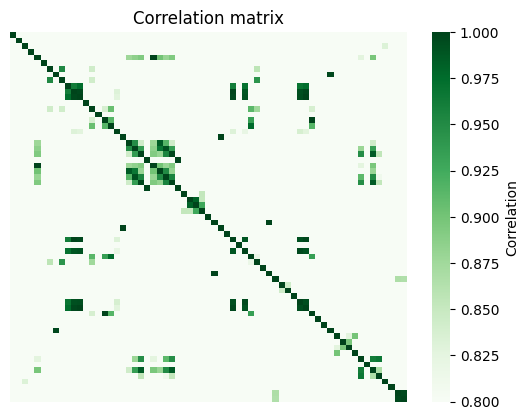

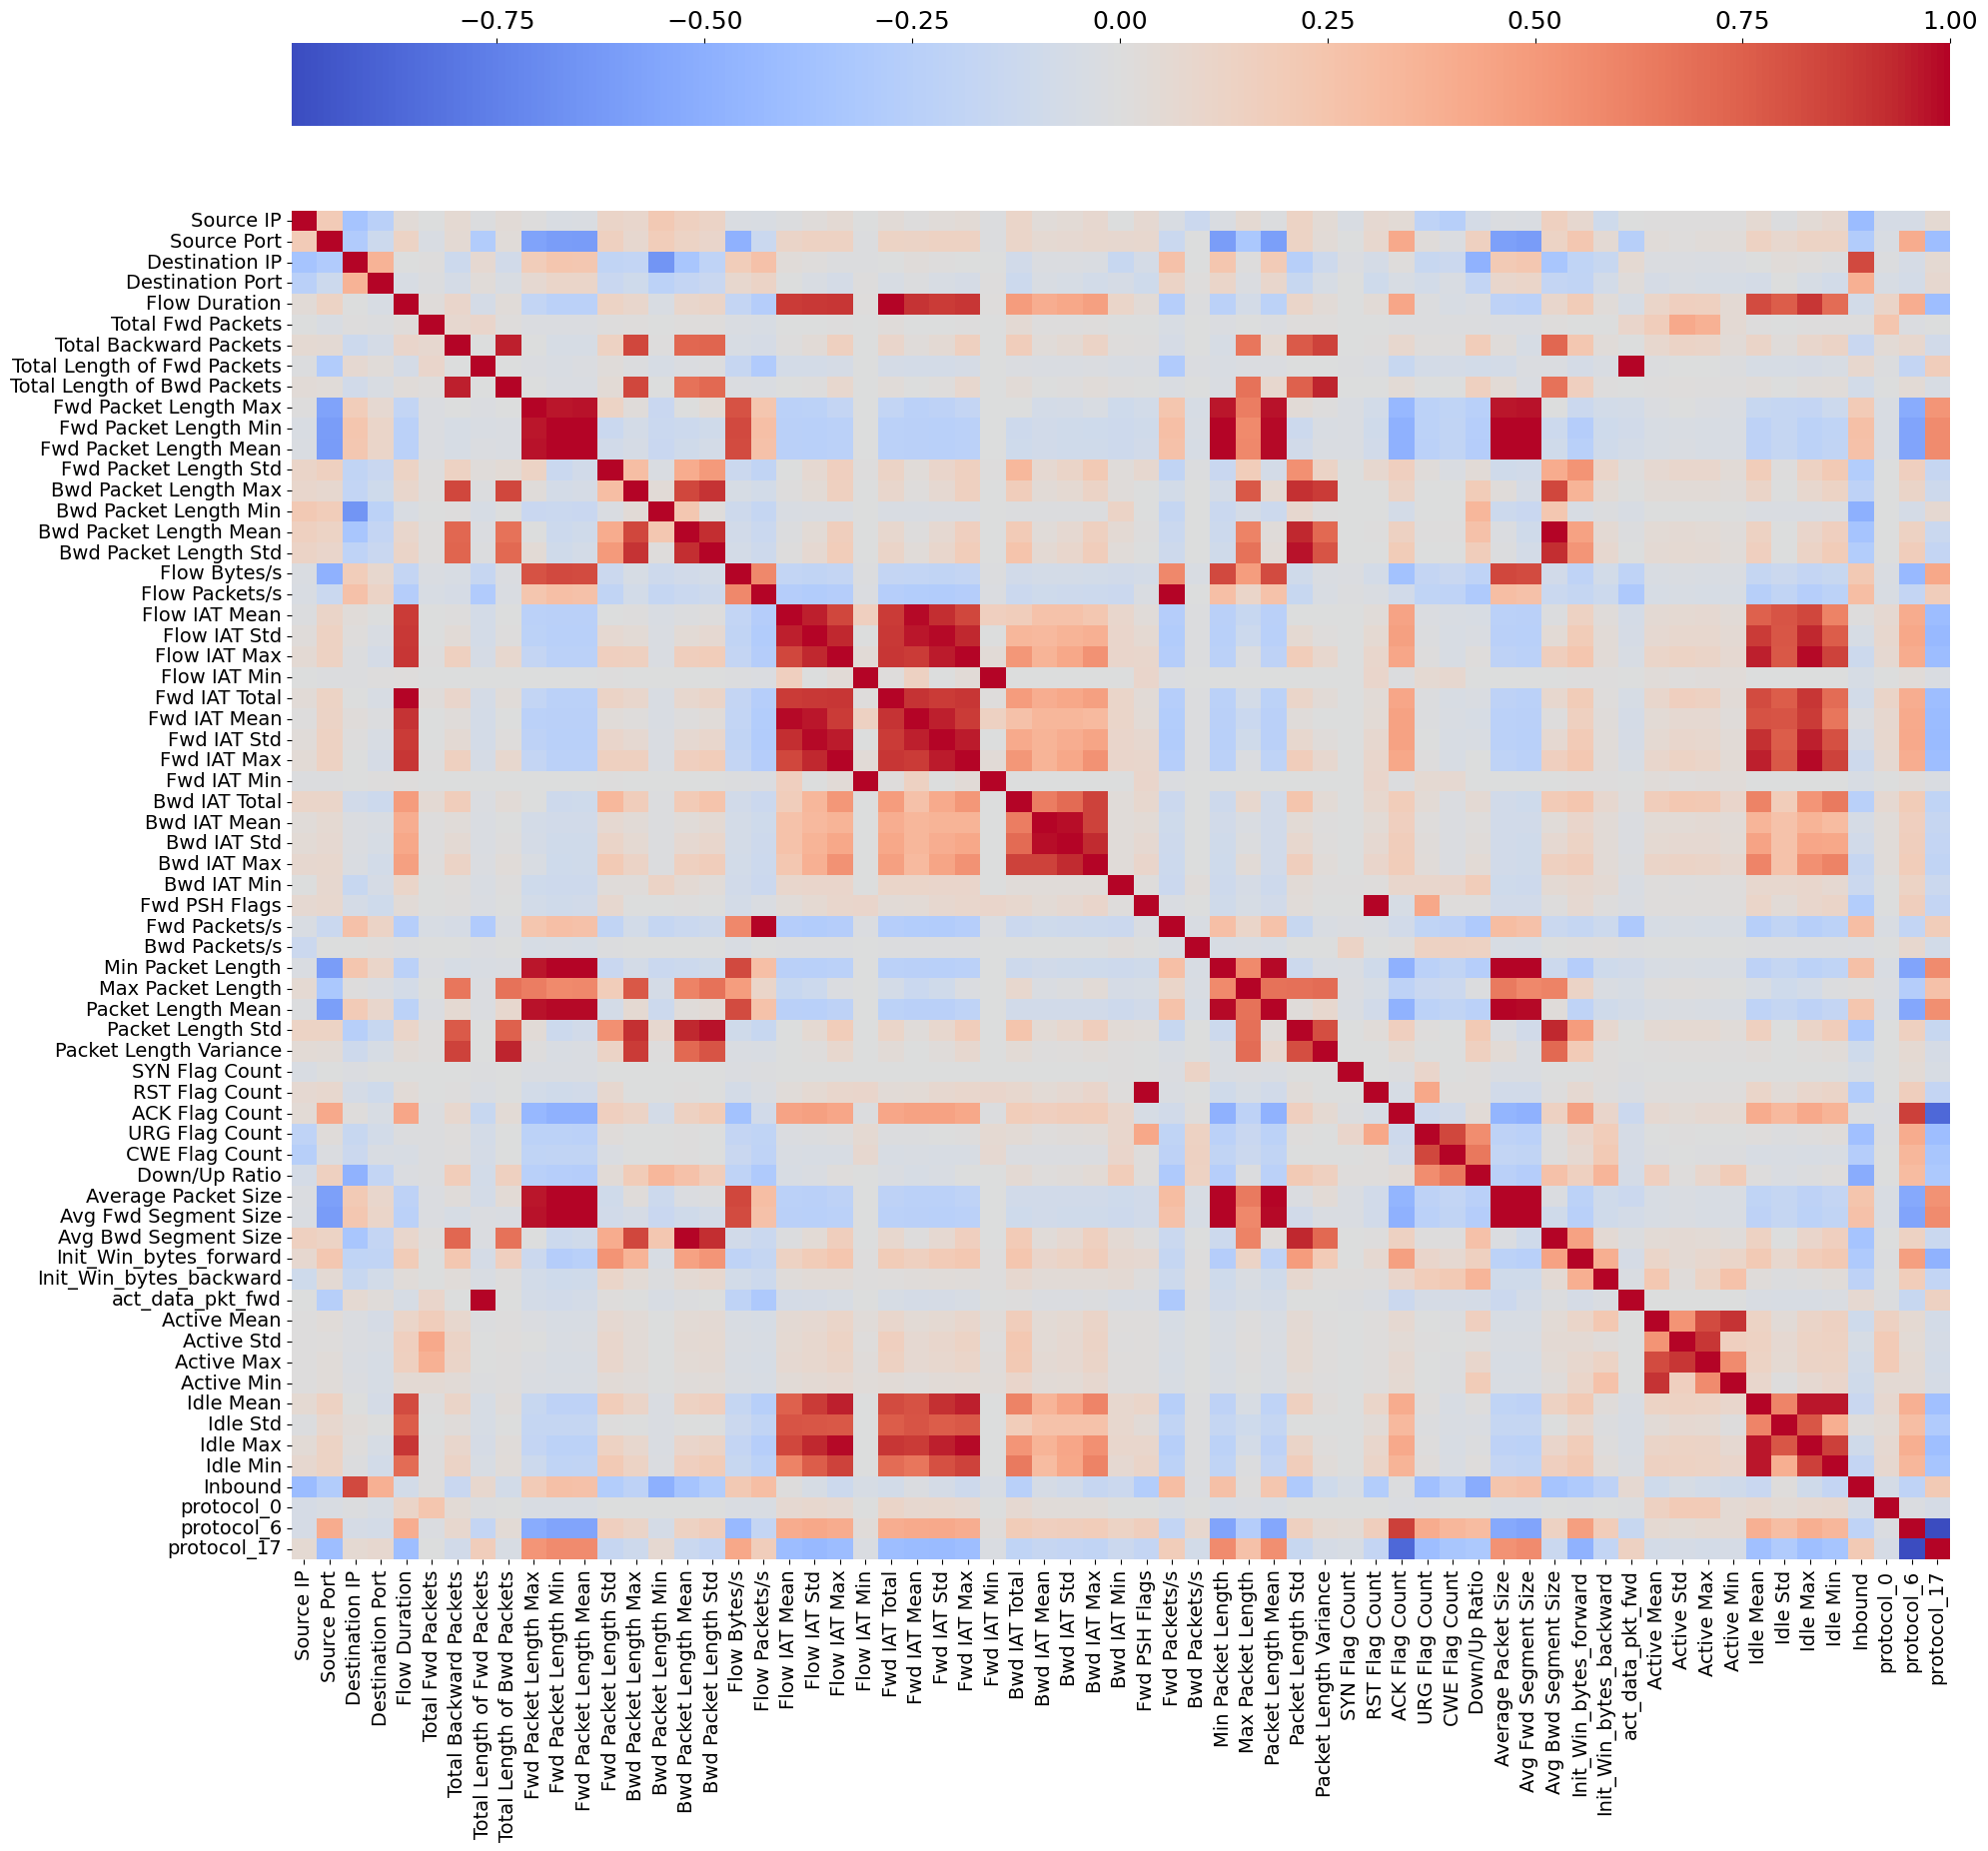

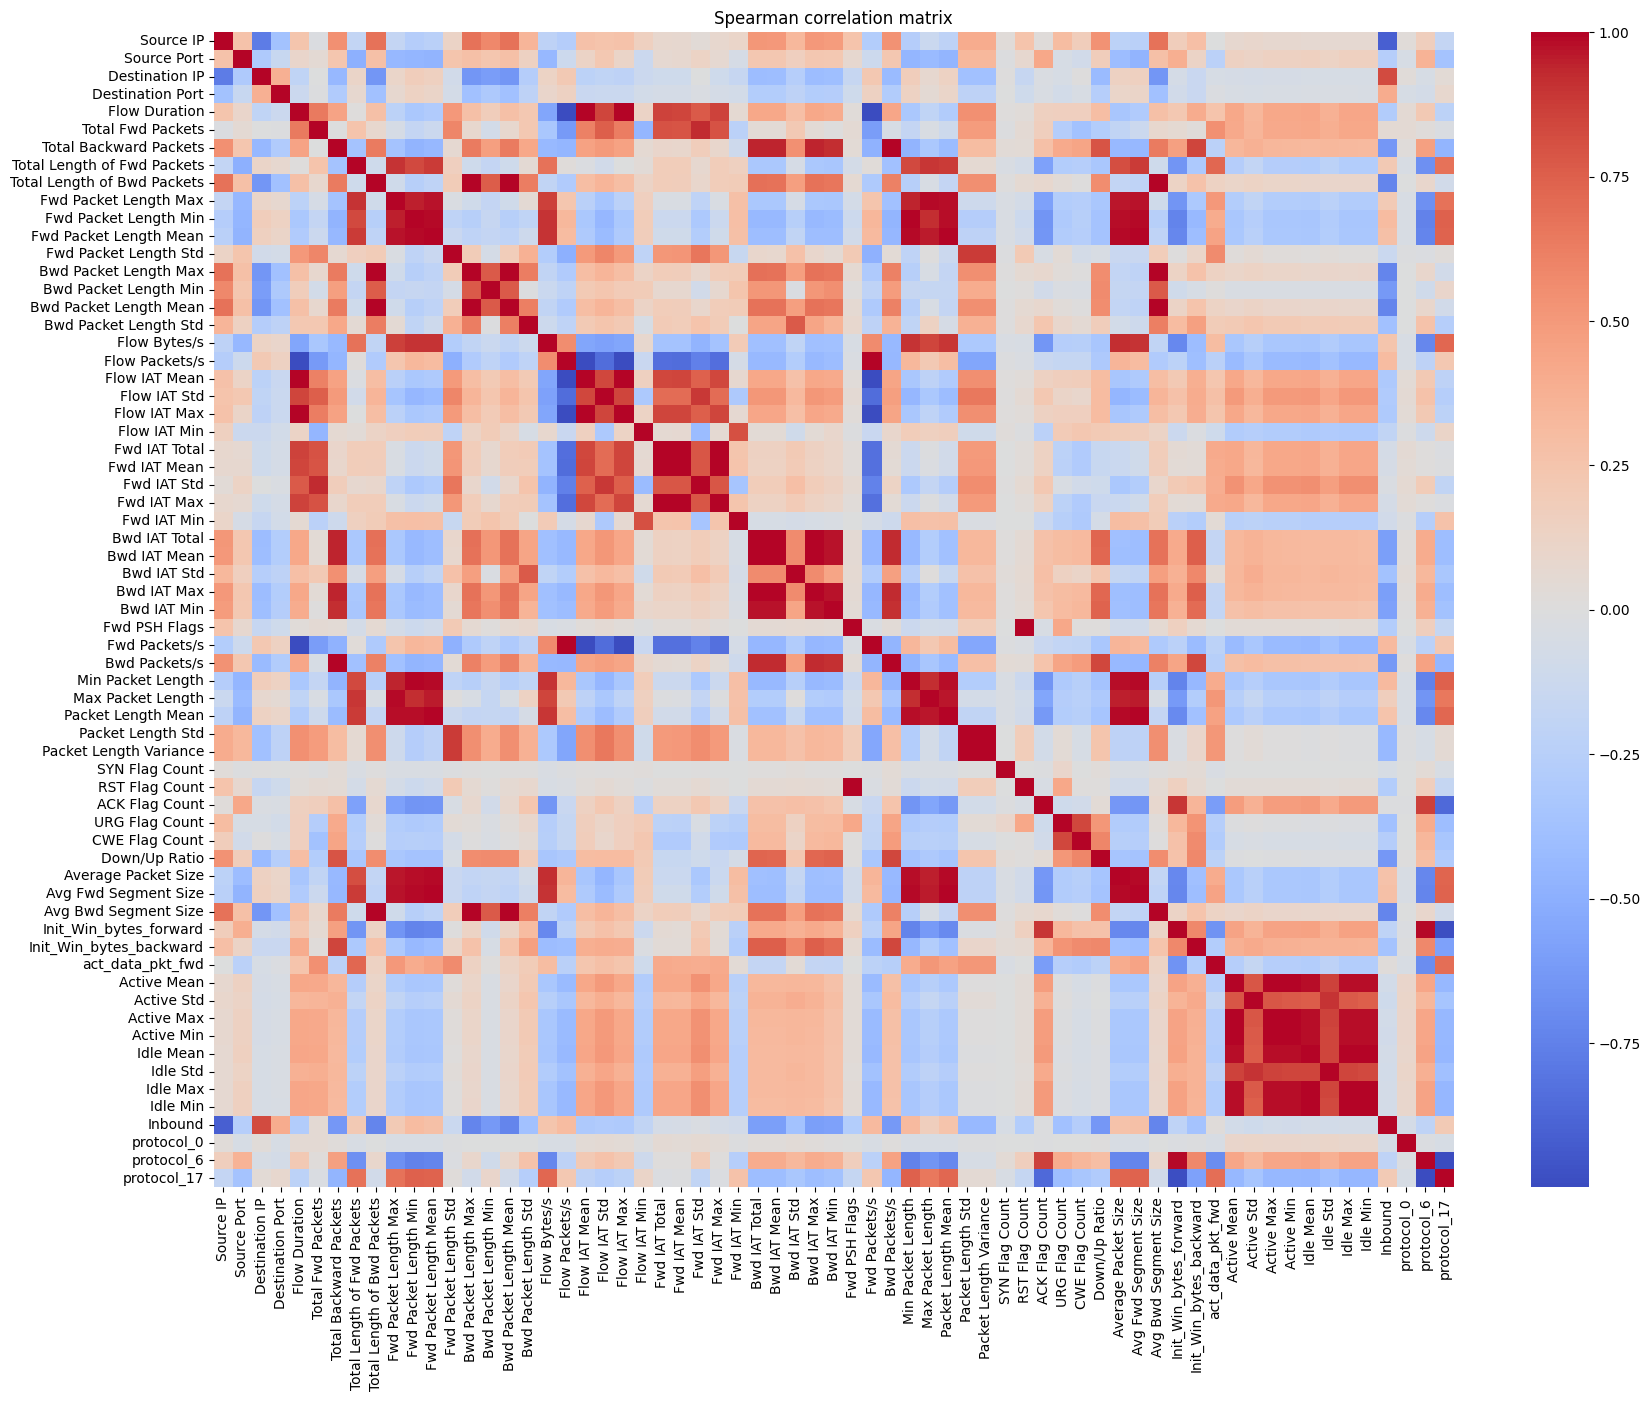

In [7]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr().abs()

# Compute the heatmap (correlation matrix)
plt.figure()
sns.heatmap(correlation_matrix, cmap='Greens', vmin=0.8, vmax=1, xticklabels=False, yticklabels=False , cbar_kws={'label':'Correlation'})      # we show the correlation when it is > 0.8
plt.title('Correlation matrix')
plt.show()

plt.figure(figsize=(20, 20))
correlation_matrix = df_cleaned.corr()
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True, cbar_kws={'location': 'top'})
plt.tick_params(labelsize=14)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
correlation_matrix = df_cleaned.corr('spearman')
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Spearman correlation matrix')
plt.show()

### Principal Component Analysis (PCA)
Use a number components where you meet the elbow point. i.e., if increasing the number of components does not increase much the cumulative explained variance. Remember: it is essential to perform data standardization before performing PCA.

40 PCs explain 99.92% of variance


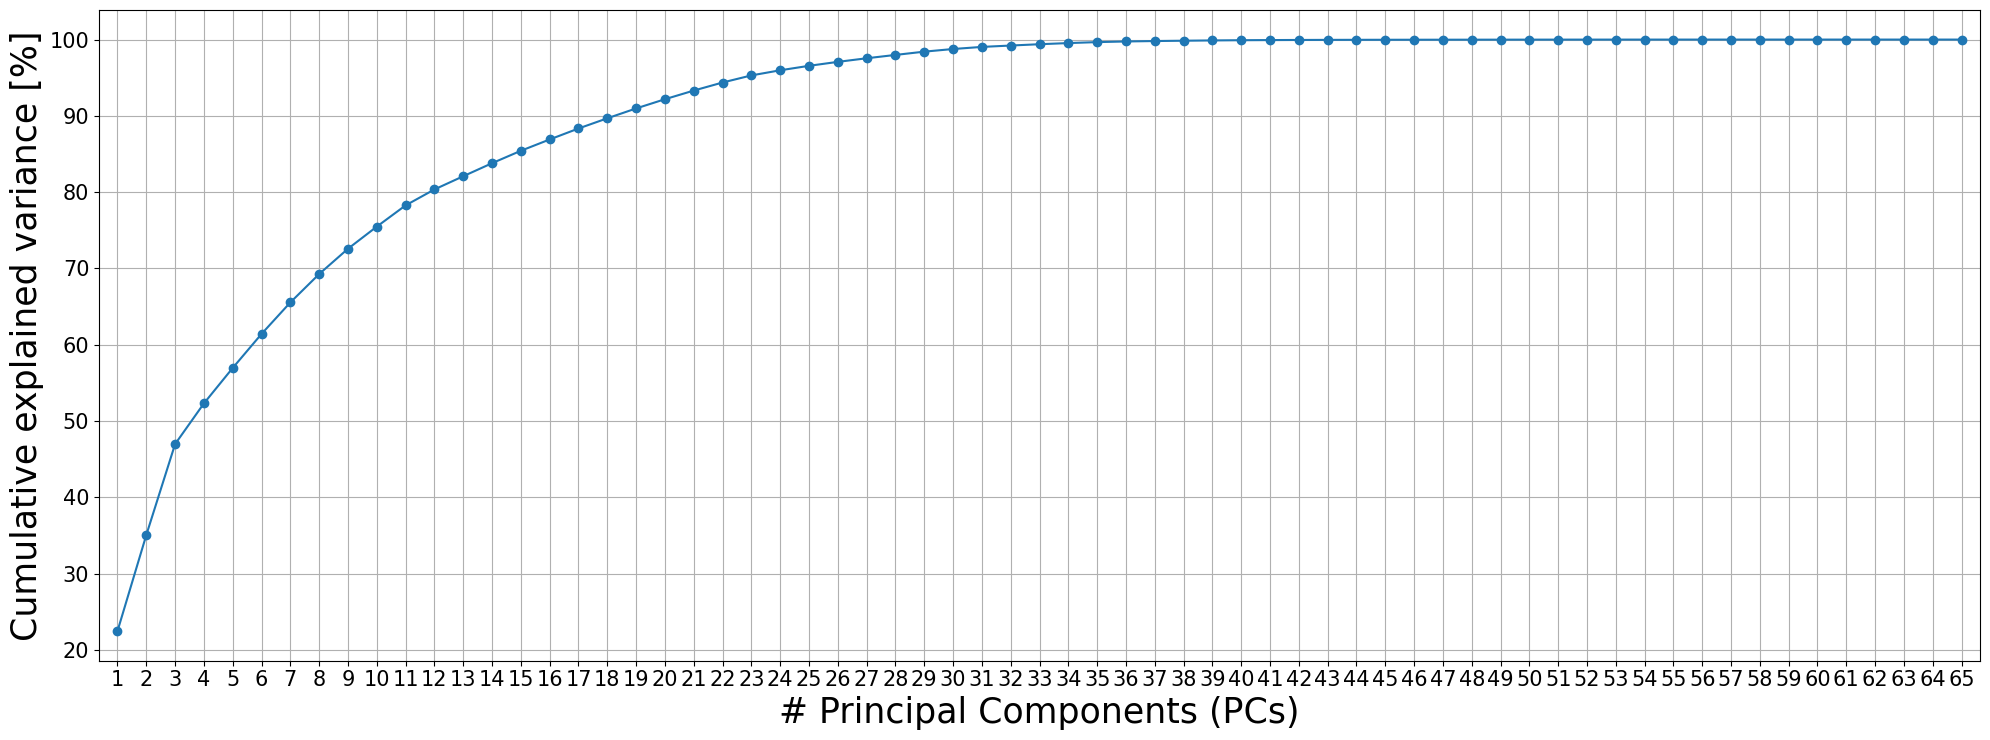

In [8]:
# Data standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

df_pca = df_scaled.copy()
pca = PCA(random_state=42)      # PCA must be initialized with a random state to initialize the space
pca.fit(df_pca)   # compute the new dimensions with number of features from 1 to the number of original features
                                                # .dropna() is for deleting NaN values
explained_variance = pca.explained_variance_ratio_      # describe how much of the dataset variability is indicated by a given amount of features
cumul_exp_var = np.cumsum(explained_variance)       # evaluate the total dataset variability while increasing the variables
perc_cumul_exp_var = cumul_exp_var * 100        # percentage value to better understand the best number of components

# Set the number of PC to take
PC_number = 40

# Make the plot of cumulative explained variance with respect to number of components
plt.figure(figsize=(20,7.5))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)', fontsize=25)
plt.ylabel('Cumulative explained variance [%]', fontsize=25)
plt.xticks([i for i in range(np.shape(df_pca)[1])], [i for i in range(1,np.shape(df_pca)[1]+1)], fontsize=15)
plt.yticks(fontsize=15)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid()
print(f'{PC_number} PCs explain {round(perc_cumul_exp_var[PC_number-1], 2)}% of variance')        # round(perc_cumul_exp_var[x], 2) calculates the percentage explained by the first x PCs
plt.show()

### PCA transformation

In [9]:
# initialize the PCA with the best number of components, in this case, it's 40
pca = PCA(n_components=40, random_state=42)

# fit the data to new space
pca.fit(df_pca)        # it determines the directions along which the data varies the most

# transform the original data into PCA components
pca_result = pca.transform(df_pca)

# create the new dataset
new_columns = [f'PC{i}' for i in range(1, PC_number+1)]
df_pca_result = pd.DataFrame(pca_result, columns=new_columns)           # pd.DataFrame(...): crea un nuovo DataFrame con i dati trasformati, utilizzando le colonne denominate 'component_1', 'component_2', e 'component_3'

# We need to reset the index to make the labels match the samples (otherwise it tries to match it by indexes, but in the original df they're non-contigous)
df_pca1 = df_pca_result.reset_index(drop=True)
labels2 = labels.reset_index(drop=True)
df_pca_result = pd.concat([df_pca1, labels2], axis=1)

# Save the transformed dataset in a csv file to reuse it in the next jupyter notebook
df_pca_result.to_csv("pca_dataset.csv")

df_pca_result

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -0.538558 -0.989192  0.199812 -0.283856  0.952000  2.896558 -0.787465   
1     -0.489696 -0.679478  0.688294  0.645742 -0.508964  0.748535  0.459545   
2     -0.553760 -1.083114  0.307800 -0.151948  1.441581  4.833613 -1.248622   
3     -0.489063 -1.068868  0.435160  0.080512  1.269639  4.910332 -1.166923   
4     -0.520270 -1.075401  0.376160 -0.027590  1.349583  4.873034 -1.203640   
...         ...       ...       ...       ...       ...       ...       ...   
64234 -0.830464 -0.944685  0.040638 -0.892936  0.743793 -0.609178  0.869501   
64235  0.115195 -1.284971  0.804485 -0.174866  0.334827  1.111649  0.254439   
64236 -0.799188 -0.982666  0.067745 -0.917037  0.754730 -0.641857  0.915042   
64237  0.115555 -1.268340  0.825153 -0.113499  0.274620  1.086406  0.288592   
64238 -0.682462 -0.953884  0.299117 -0.489529  0.438929 -0.499055  1.061595   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     -1.437720  0.220387 -0.182904  0.169538  0.253415 -0.175637  0.067097   
1      1.078035  0.474208  0.045004 -0.511093  0.127547  0.057749  0.269167   
2     -2.332504  0.564322 -0.655297  0.739824  0.400410  1.507239 -0.733469   
3     -2.018224  0.621011 -0.739208  0.841845  0.347102  1.824949 -0.927545   
4     -2.163719  0.595188 -0.700332  0.794092  0.371982  1.679797 -0.837955   
...         ...       ...       ...       ...       ...       ...       ...   
64234 -0.012041  0.424456  0.231657 -0.893064  0.278340  0.035185  0.586687   
64235  0.280347  0.173526  0.086387  0.066884 -0.056104 -1.698802  0.887977   
64236  0.029031  0.436308  0.240503 -0.897233  0.283960 -0.041120  0.618288   
64237  0.392184  0.180373  0.074906  0.081067 -0.068424 -1.664045  0.847283   
64238  0.602143  0.539384  0.086130 -0.710050  0.185933  0.546130  0.260640   

           PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0      0.049411 -0.220647  0.081498 -0.107159 -0.334793  0.940951  0.166581   
1     -0.303742  0.009447 -0.327320 -0.403006 -0.265726  0.915704  0.527324   
2      0.049291 -0.326268 -0.004490 -0.042169 -0.243726  0.699696 -0.033095   
3      0.080482  0.002376 -0.132400  0.114071  0.241117 -0.558561 -0.246557   
4      0.065147 -0.150047 -0.072696  0.041486  0.016109  0.024536 -0.147912   
...         ...       ...       ...       ...       ...       ...       ...   
64234 -0.759652 -0.165129  0.509463 -0.288019 -0.716613  0.813942  0.180944   
64235  0.035917  0.301199 -0.021574  0.107243  0.224044 -0.840414  0.137169   
64236 -0.741957 -0.191076  0.500271 -0.289009 -0.740141  0.878721  0.235447   
64237  0.061923  0.382211 -0.065088  0.149826  0.352488 -1.149380  0.108049   
64238 -0.686070  0.412796  0.266527 -0.002693  0.149786 -1.431036 -0.159257   

           PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0      0.483837 -0.139504 -0.535121 -0.245689 -0.132038  0.184124 -0.002334   
1      2.142817 -0.338010 -1.290665 -1.190091  0.042581  0.707927 -0.477244   
2      0.306979 -0.171187  0.203043  0.188673  0.168754  0.039328 -0.033719   
3     -0.359672 -0.073021  0.300425  0.248353  0.098876 -0.046234 -0.042864   
4     -0.050619 -0.118359  0.255509  0.220814  0.131606 -0.007029 -0.038380   
...         ...       ...       ...       ...       ...       ...       ...   
64234  0.777284  0.011205  0.051381  0.206951  0.177041  0.021275 -0.000980   
64235 -0.164011  0.151753  0.618813  0.456703  0.068971 -0.218565  0.084963   
64236  0.823608  0.007858  0.241360  0.366427  0.266057  0.014547 -0.005714   
64237 -0.333611  0.173956  0.681222  0.523377  0.074304 -0.229855  0.081466   
64238 -0.400976  0.187961  0.407035  0.465138  0.132016 -0.141717 -0.022038   

           PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     -0.095438  0.031565  0.039373  0.100254  0.063890 -0.009016  0.055445   
1     -0.727969 -0.364562 -0.198875  0.138159 -0.040664 -0

### Loading score
The loading score can be used to extract the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed. It can describe how strongly a component describes the original features and identify potentially redundant features in for a given component. Note that the score is computed as ``pca.components_.T * np.sqrt(pca.explained_variance_)``.

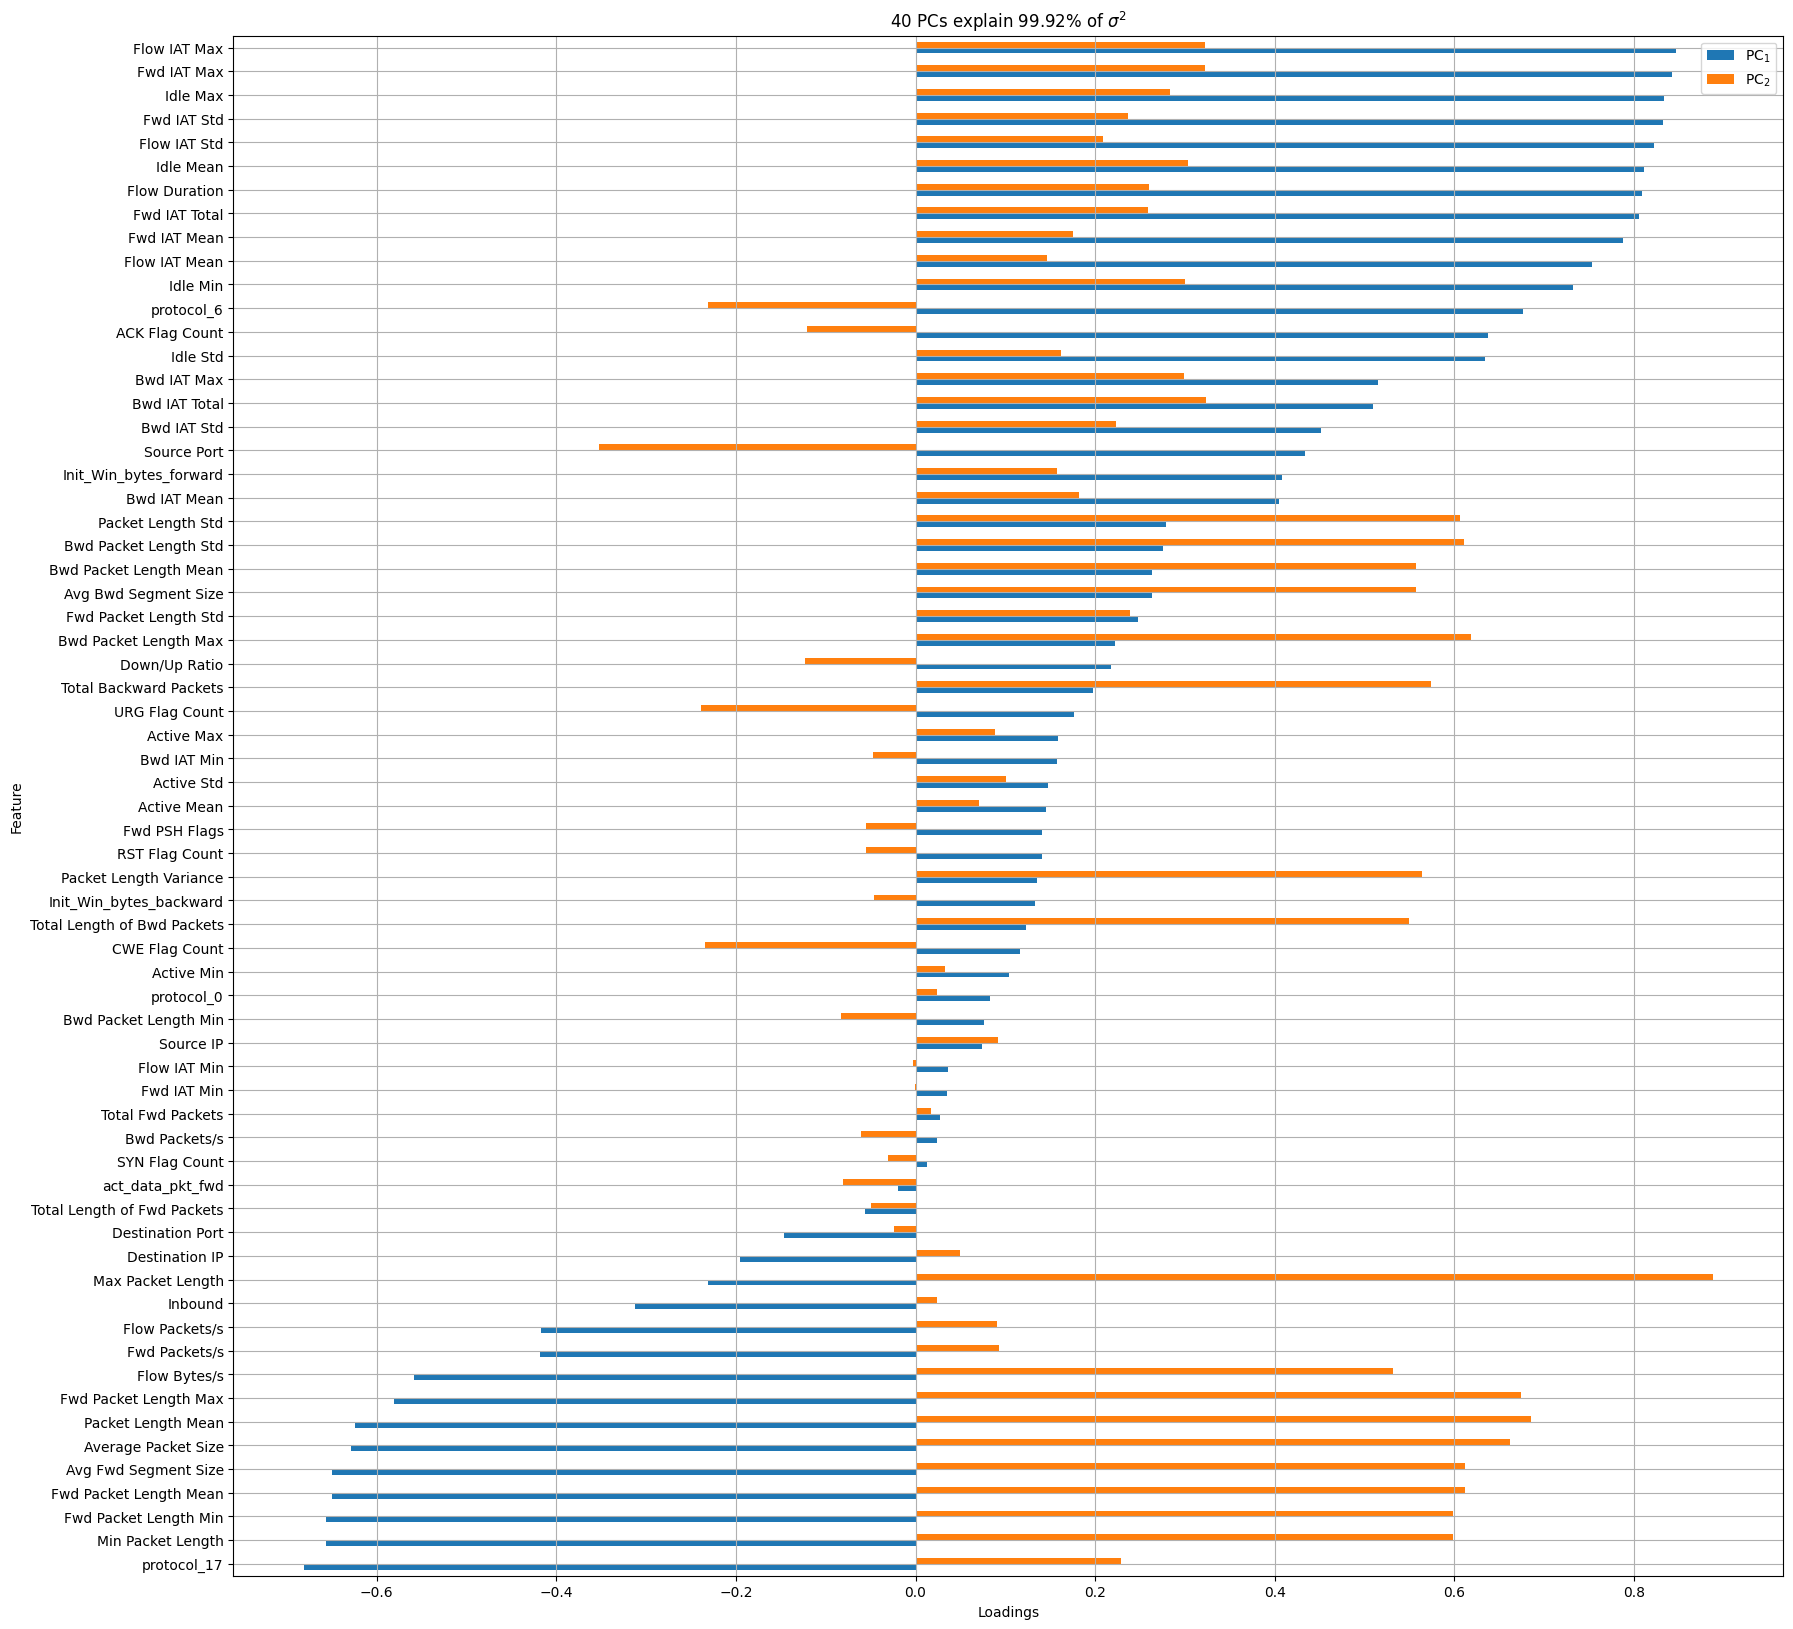

In [10]:
# Compute the loading scores and create the dataframe
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_),
    columns = new_columns,
    index = df_cleaned.columns
)

plt.figure(figsize=(20,20))
loadings = loadings[['PC1', 'PC2']]     # seleziona solo i loading scores per i primi due componenti principali
loadings.sort_values(['PC1', 'PC2']).rename(columns={'PC1':'PC$_{1}$', 'PC2':'PC$_{2}$'}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'{PC_number} PCs explain {round(perc_cumul_exp_var[PC_number-1], 2)}% of $\\sigma^2$')
plt.show()


### 1.4 ECDF of the new features
First, we plot again the correlation matrix: as expected, the principal components obtained are completely uncorrelated.

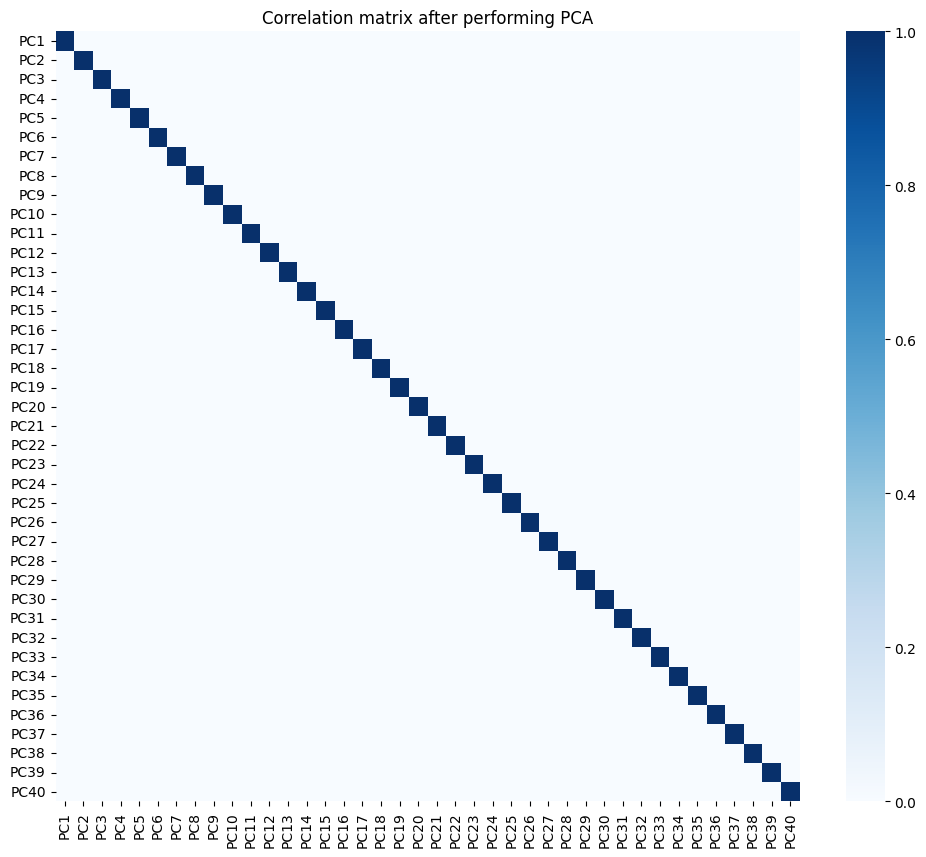

In [11]:
correlation_matrix = df_pca1.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='Blues', annot=False, cbar=True)
plt.title('Correlation matrix after performing PCA')
plt.show()

Then we plot the ECDF of the first five principal components.

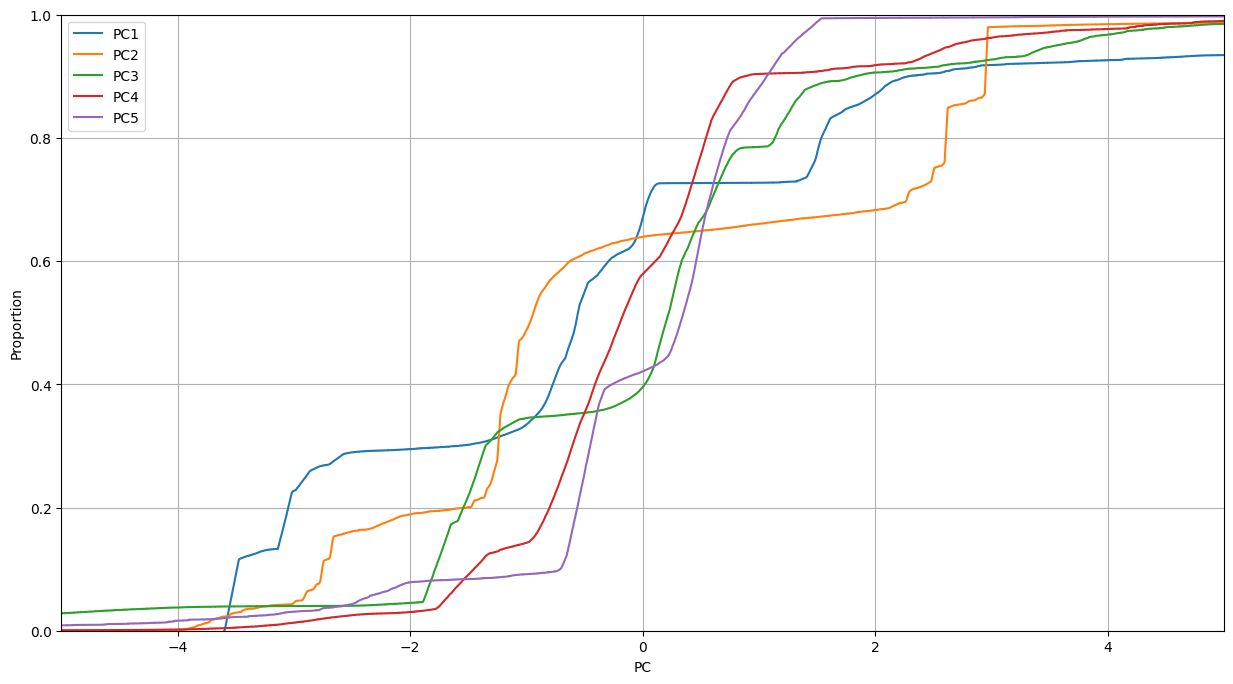

In [12]:
plt.figure(figsize=(15, 8))
for i in range(5):
    sns.ecdfplot(data=df_pca_result, x=f'PC{i+1}', label=f'PC{i+1}')
plt.ylabel('Proportion')

plt.xlim(-5,5)
plt.xlabel('PC')
plt.legend()
plt.grid()
plt.show()

Finally, we plot the ECDF of each PC obtained.

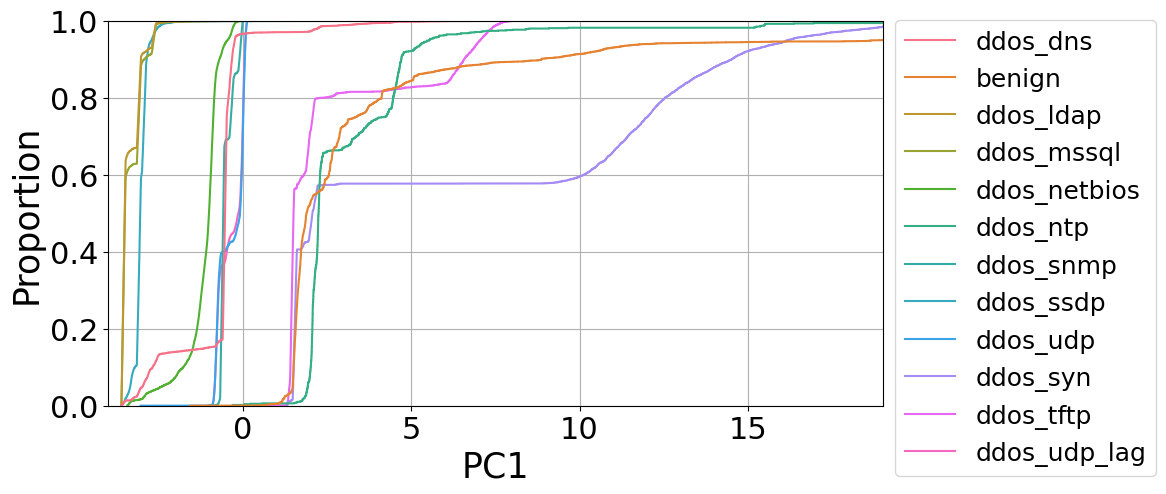

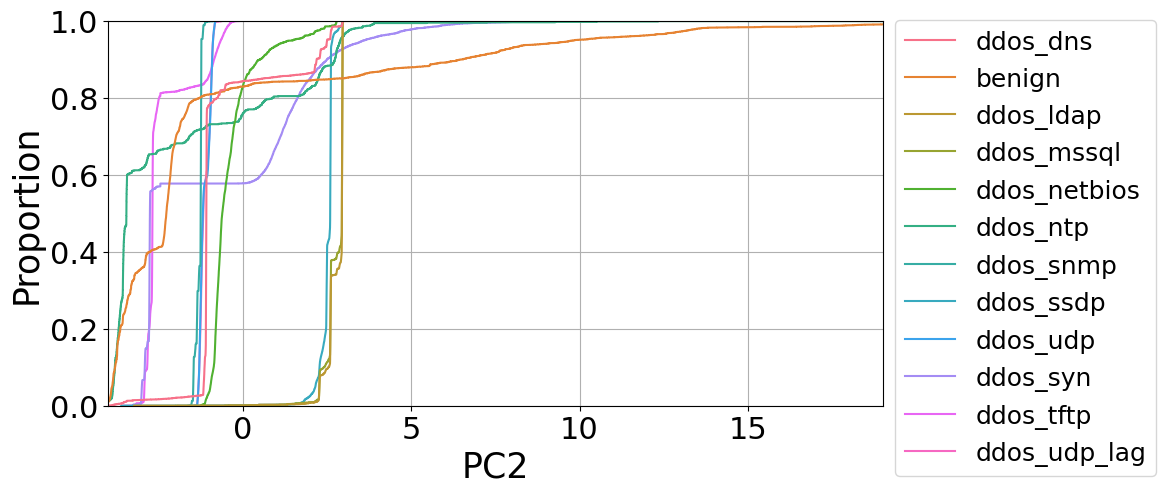

In [13]:
for i in range(2):
    plt.figure(figsize=(10, 5))
    ax=sns.ecdfplot(data=df_pca_result, x=f'PC{i+1}', hue='label')
    plt.xlabel(f'PC{i+1}', fontsize=25)
    plt.ylabel('Proportion', fontsize=25)
    plt.xticks(plt.tick_params(labelsize=22))
    #plt.title(f'ECDF of PC{i+1} per attack type')
    sns.move_legend(ax, bbox_to_anchor=(1, 1.035), loc="upper left", title=None, fontsize=18)
    plt.xlim(-4,19)
    plt.grid()
    plt.show()

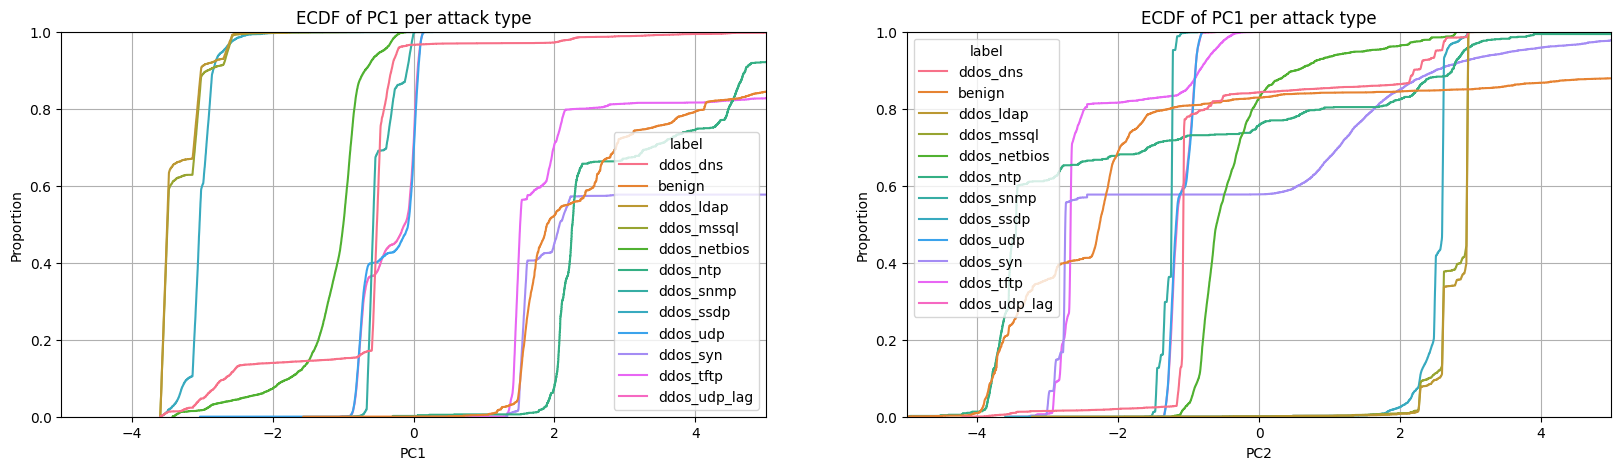

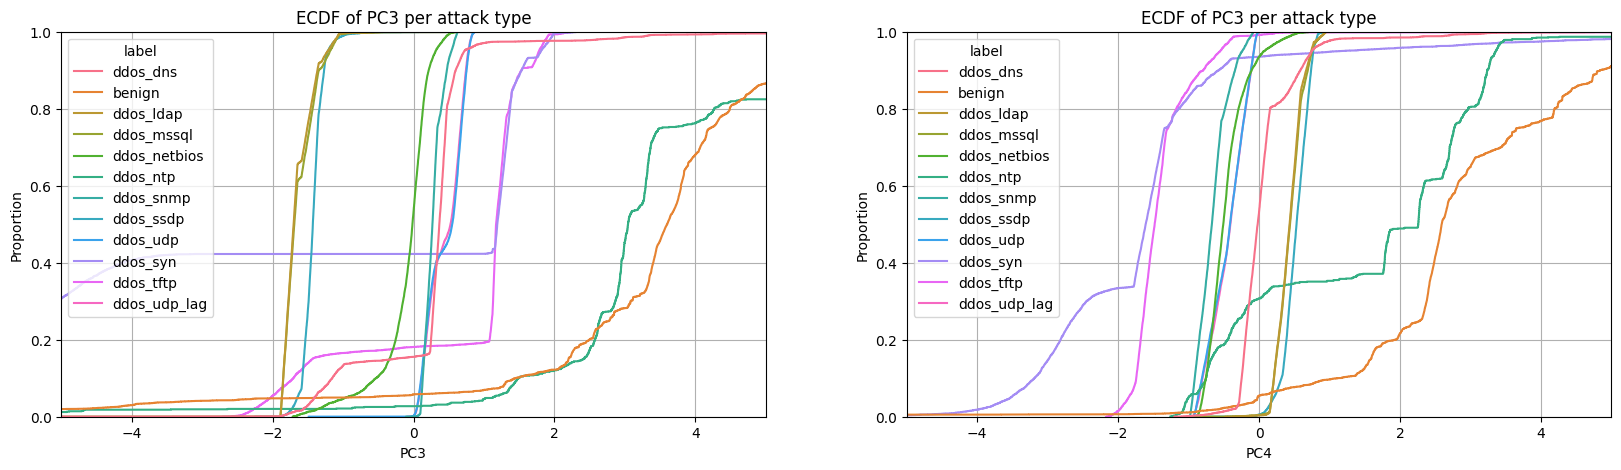

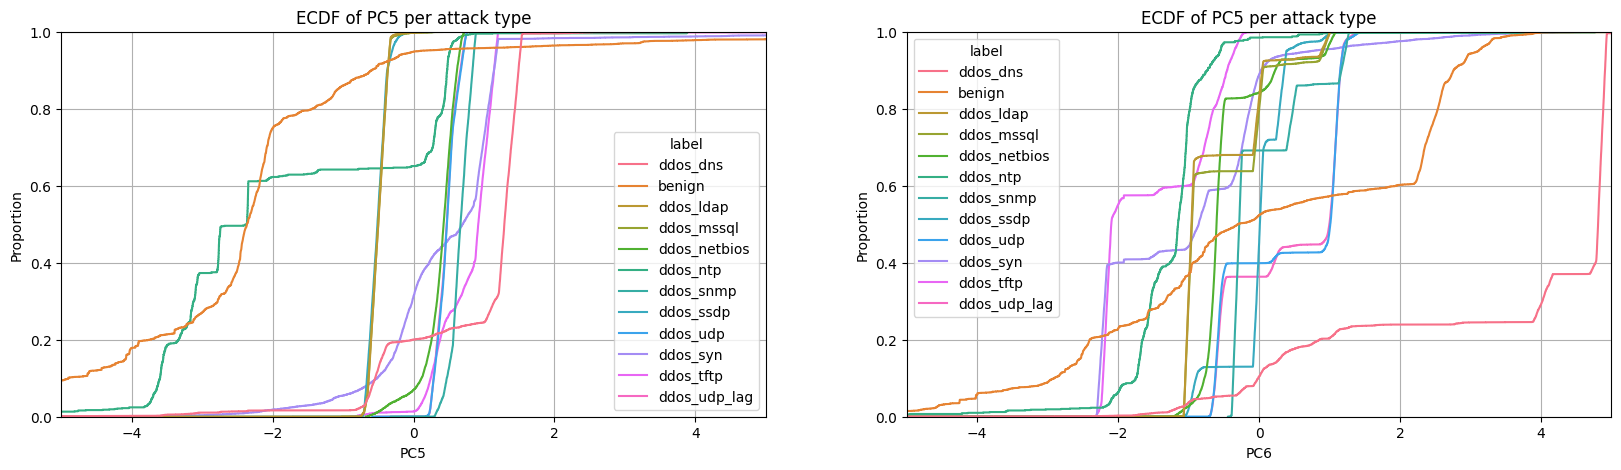

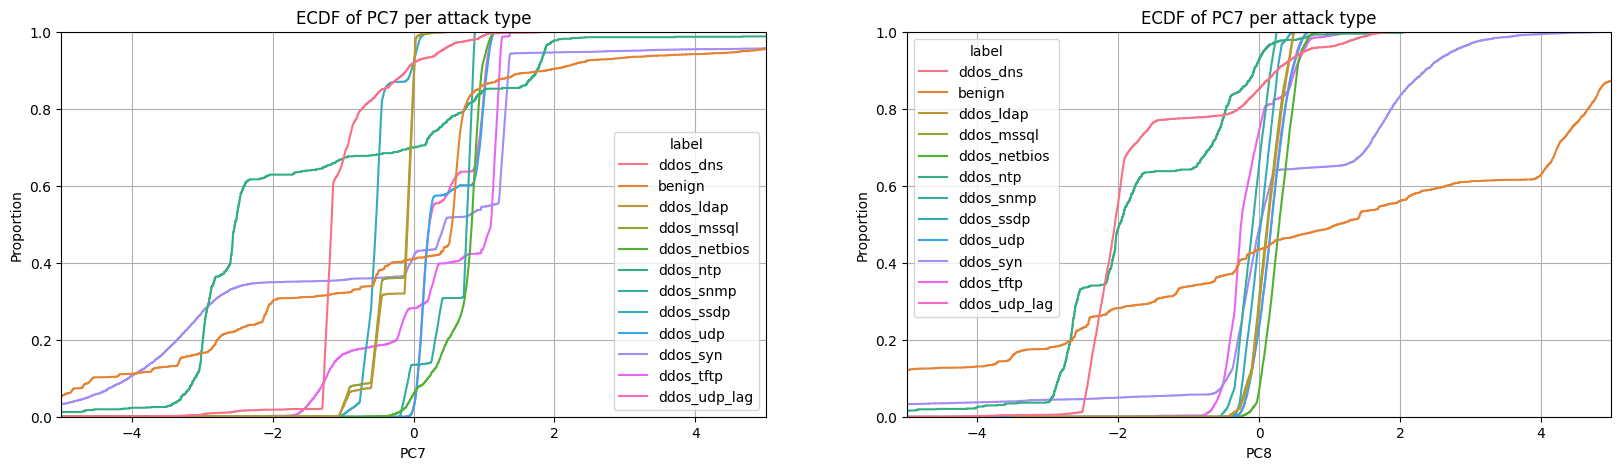

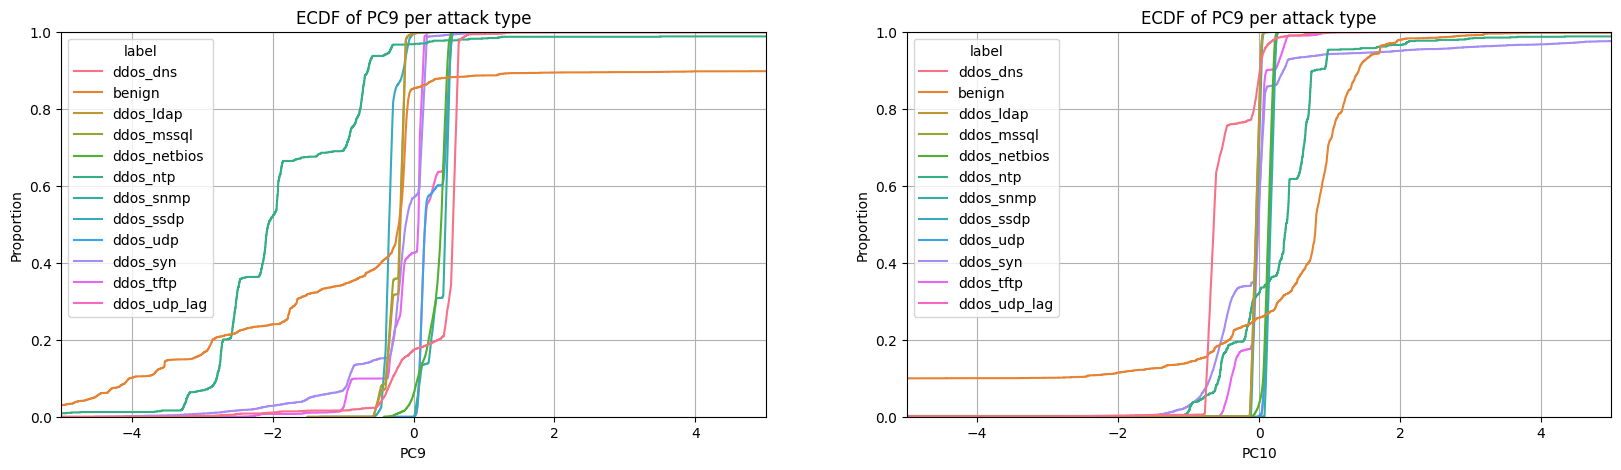

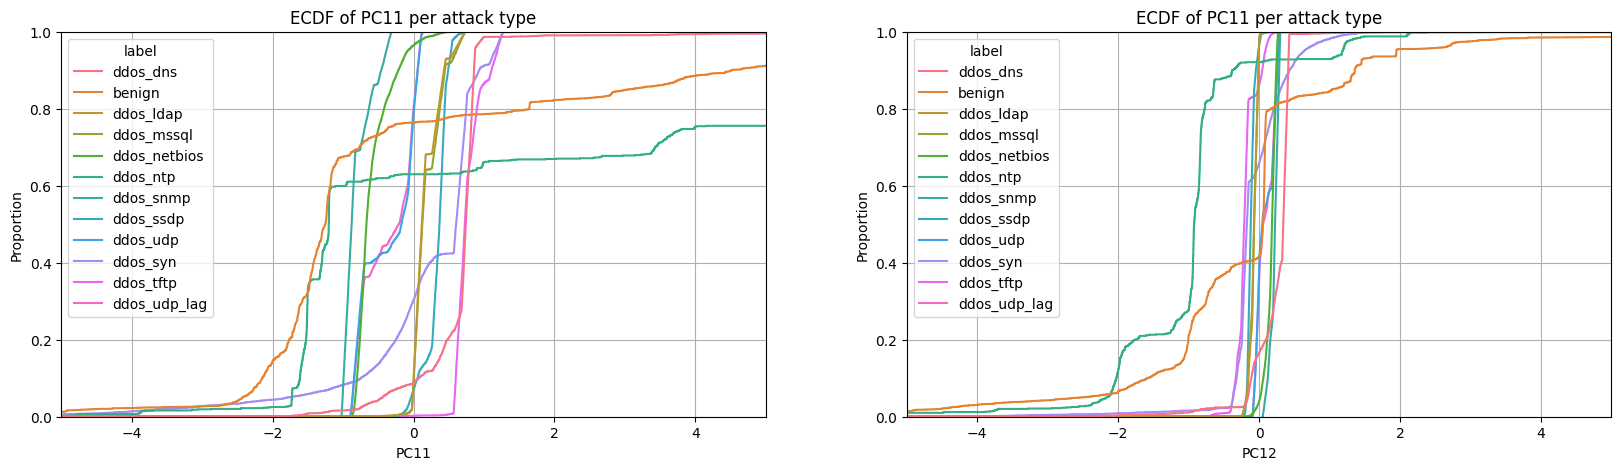

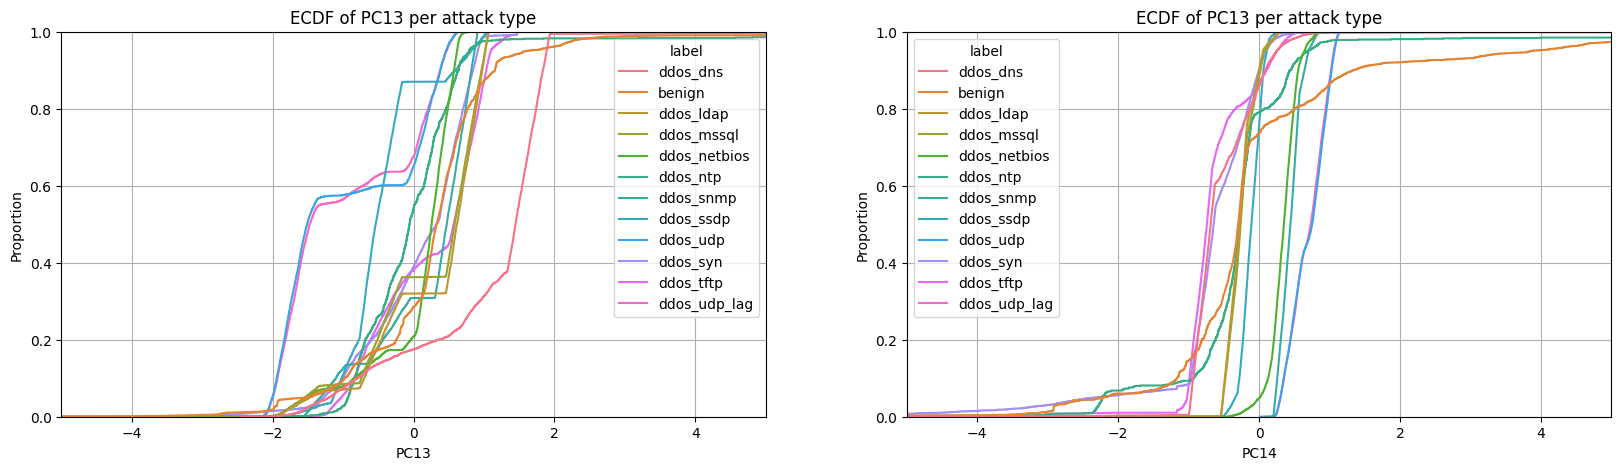

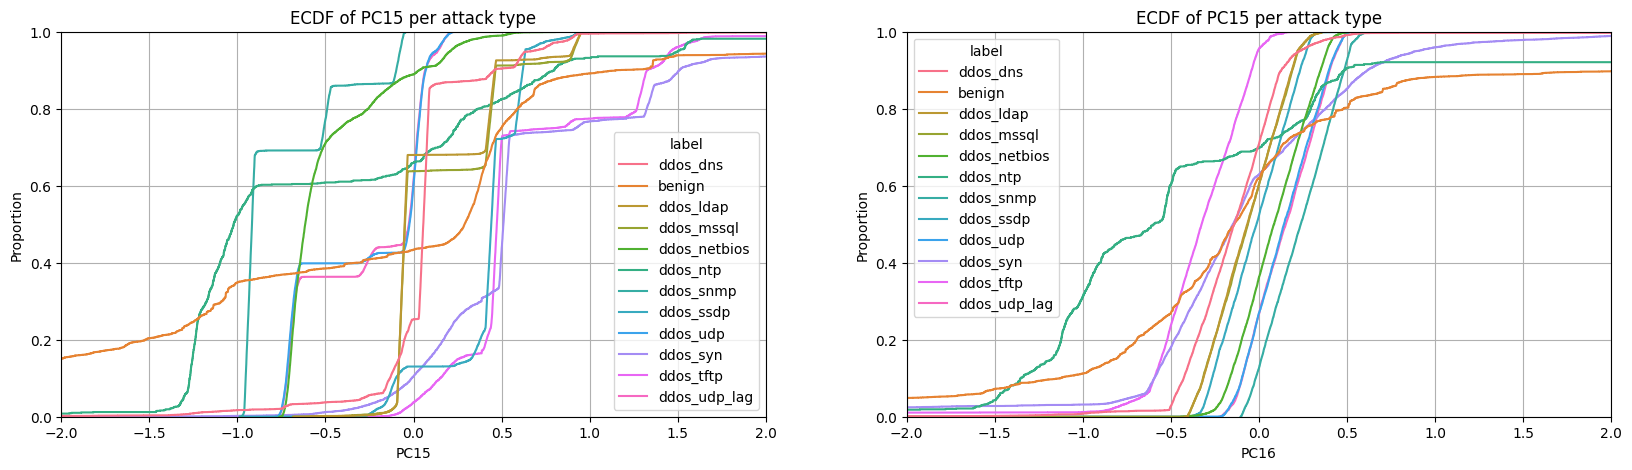

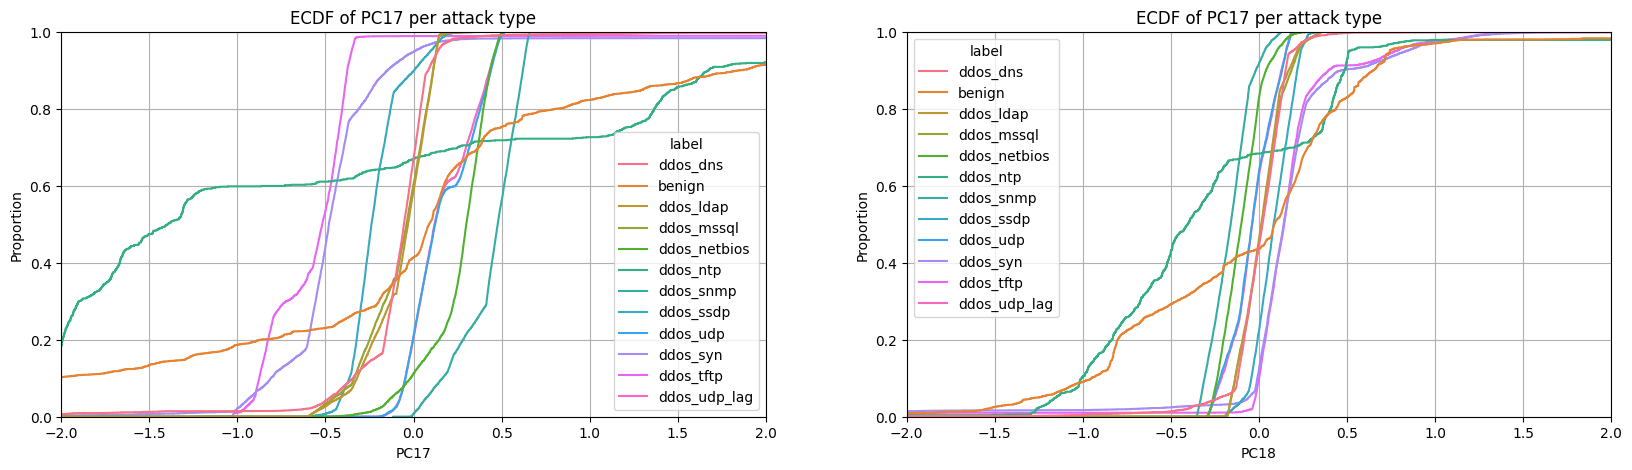

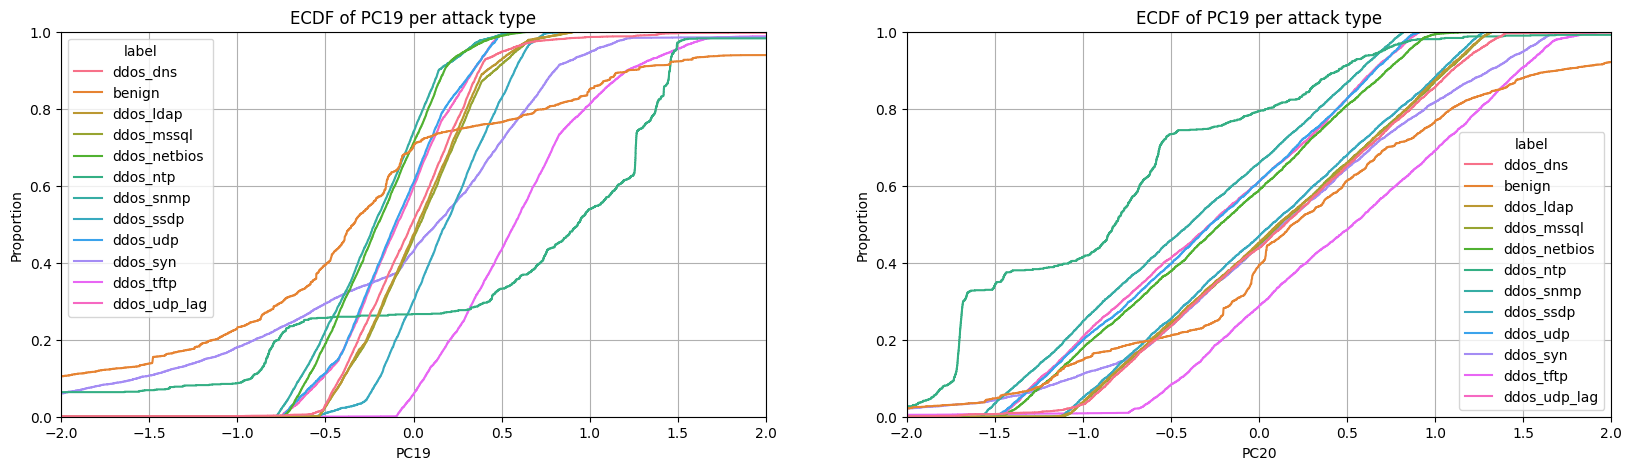

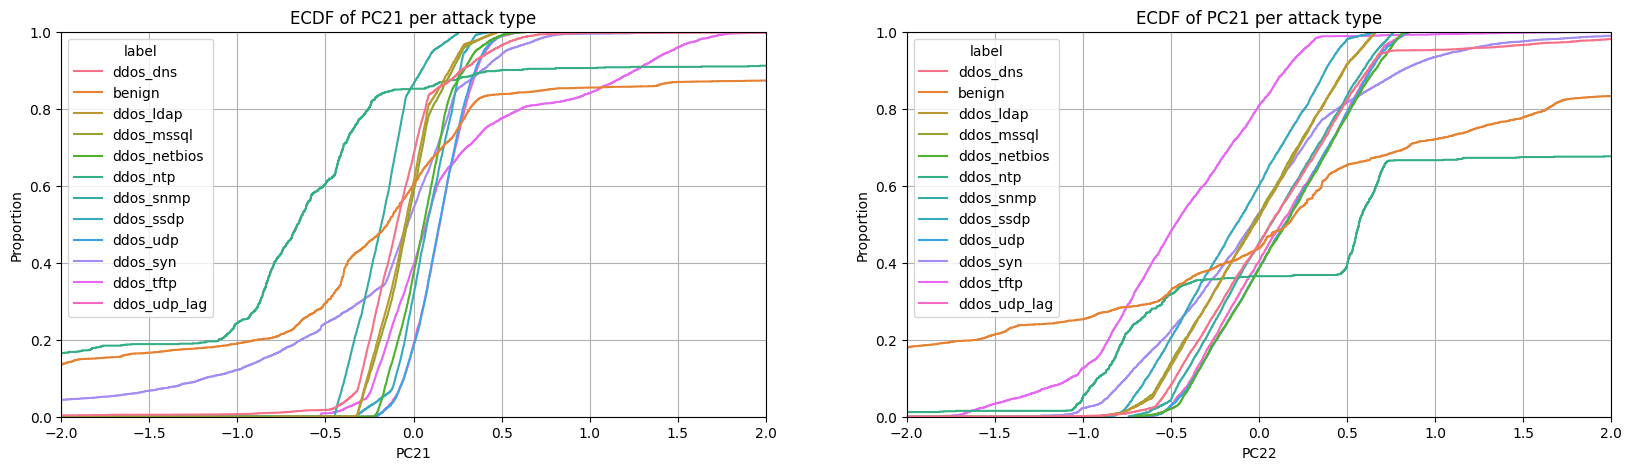

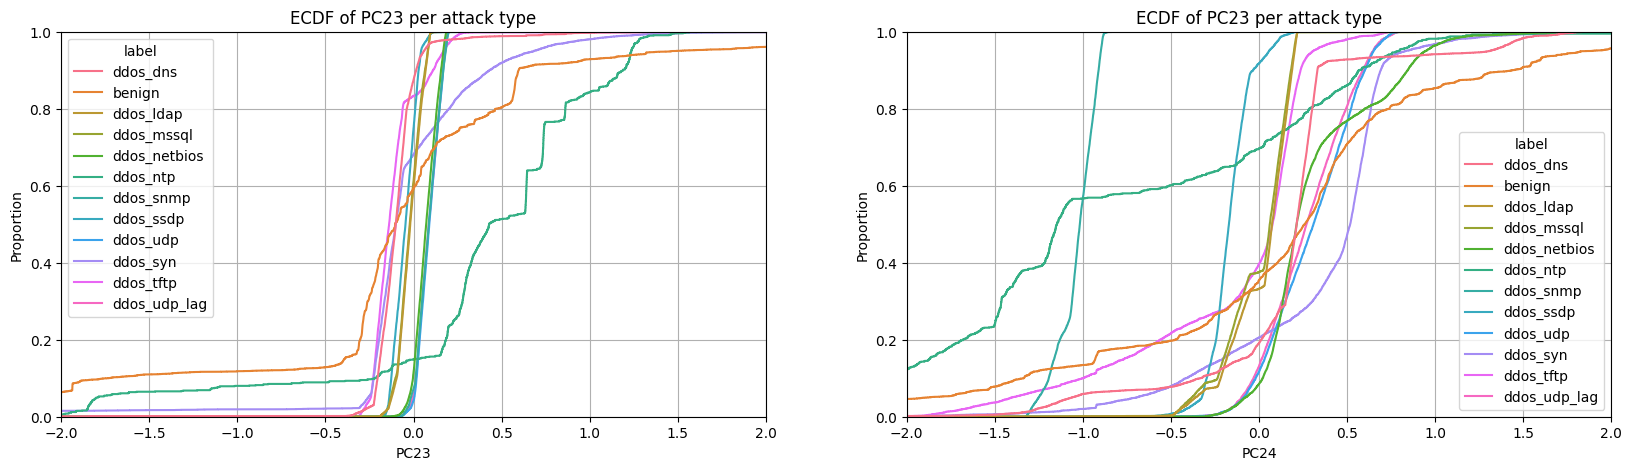

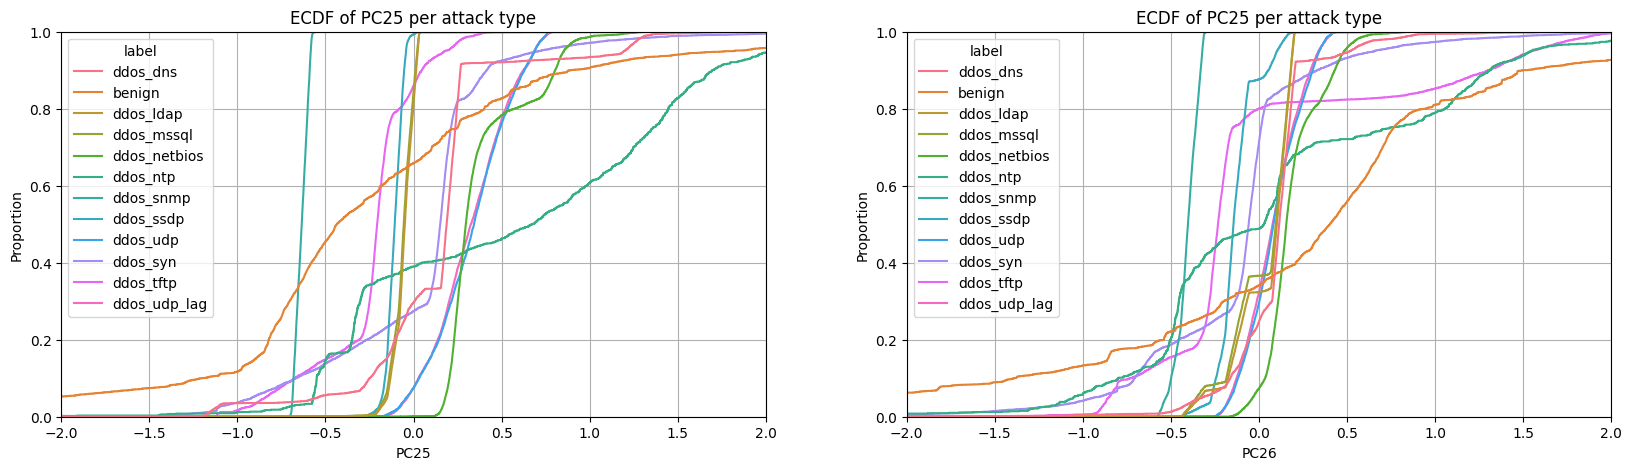

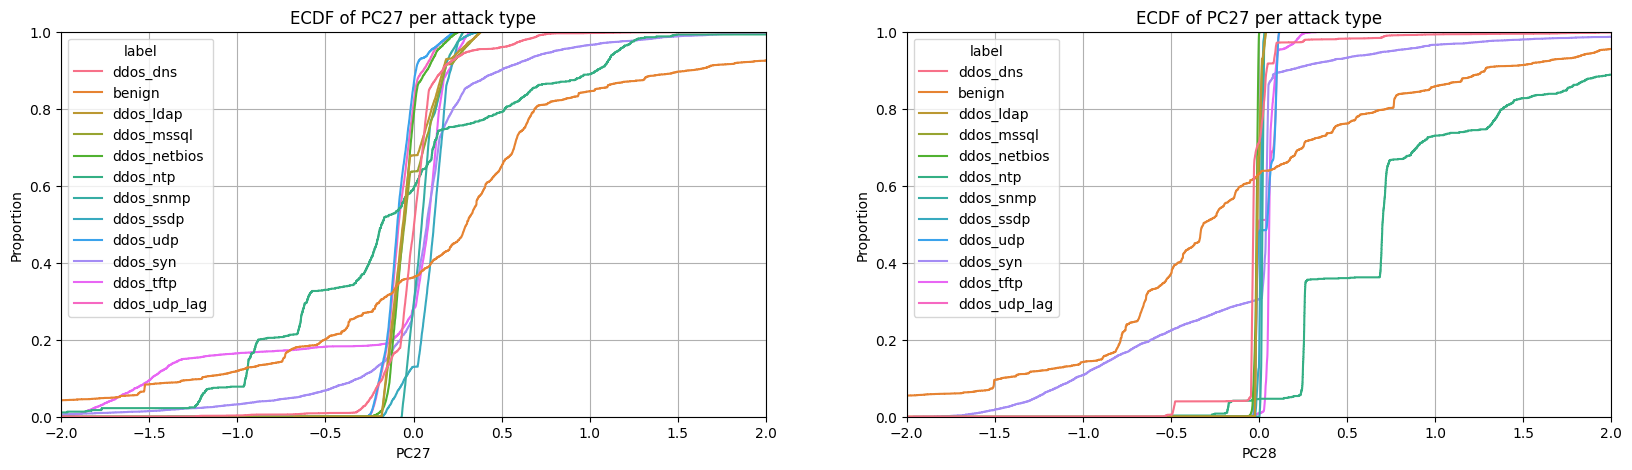

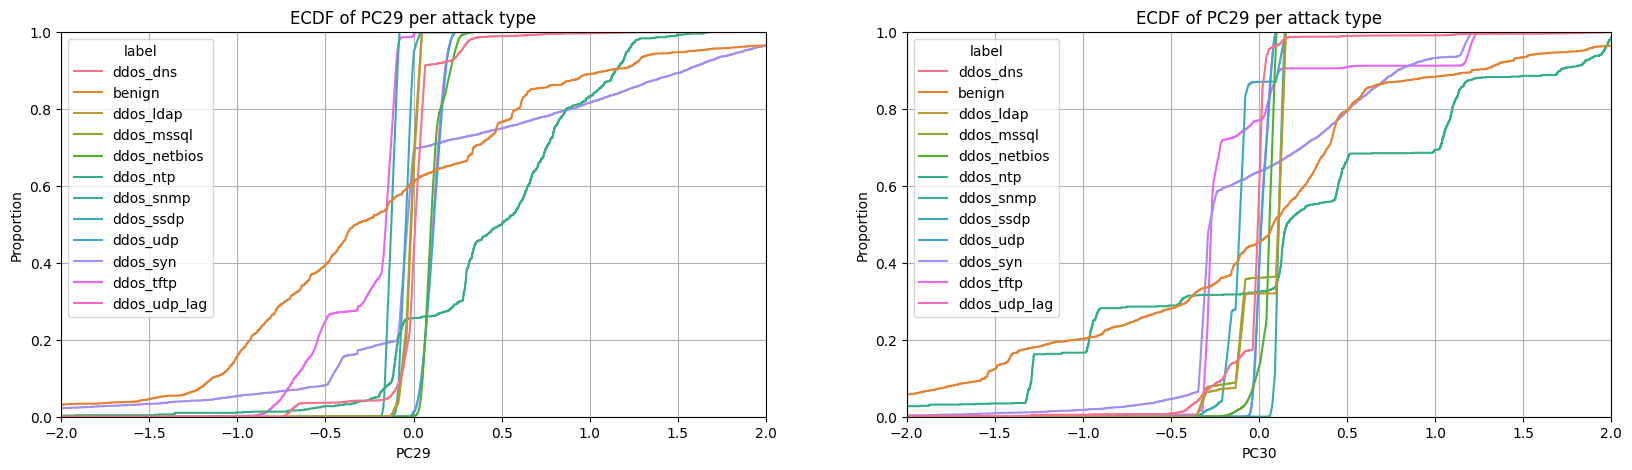

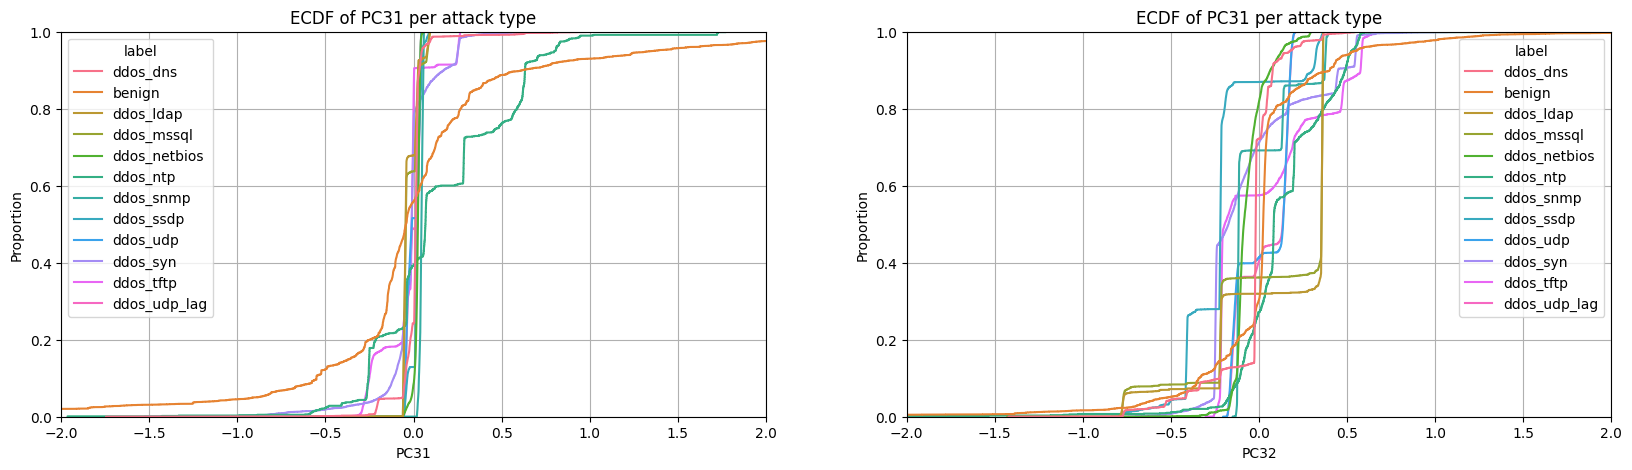

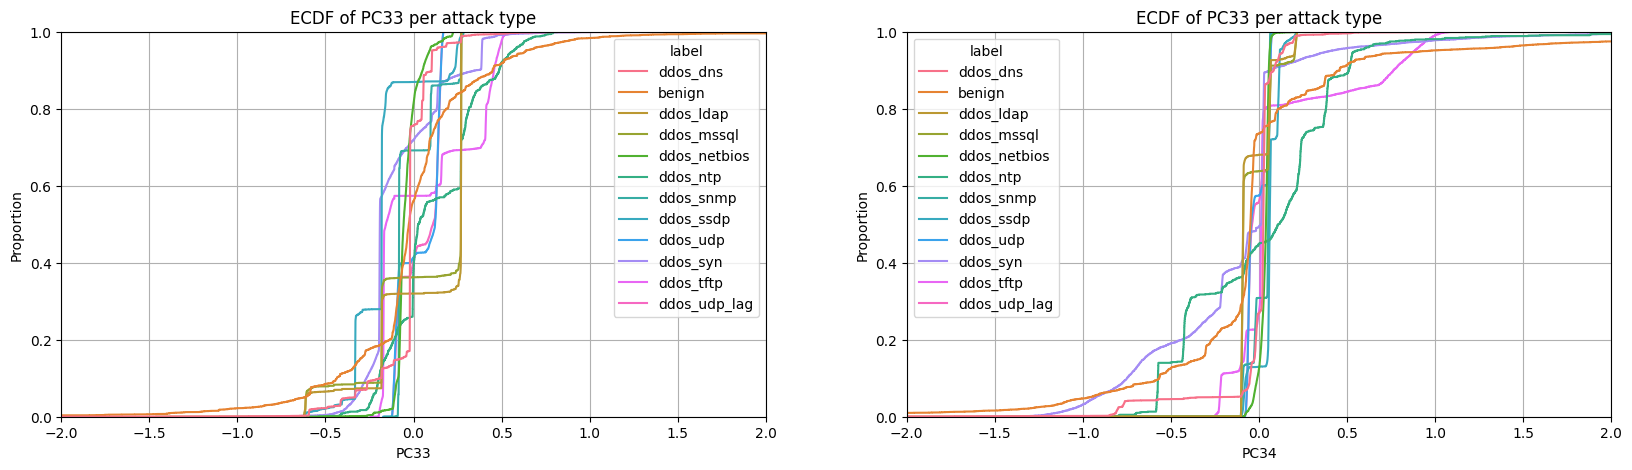

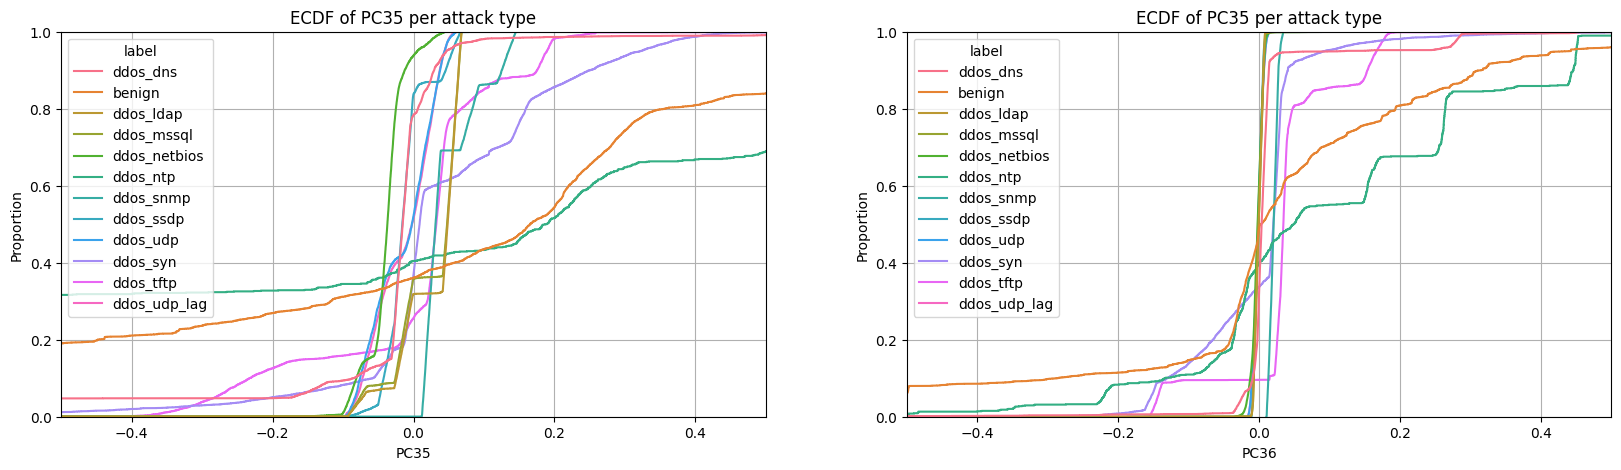

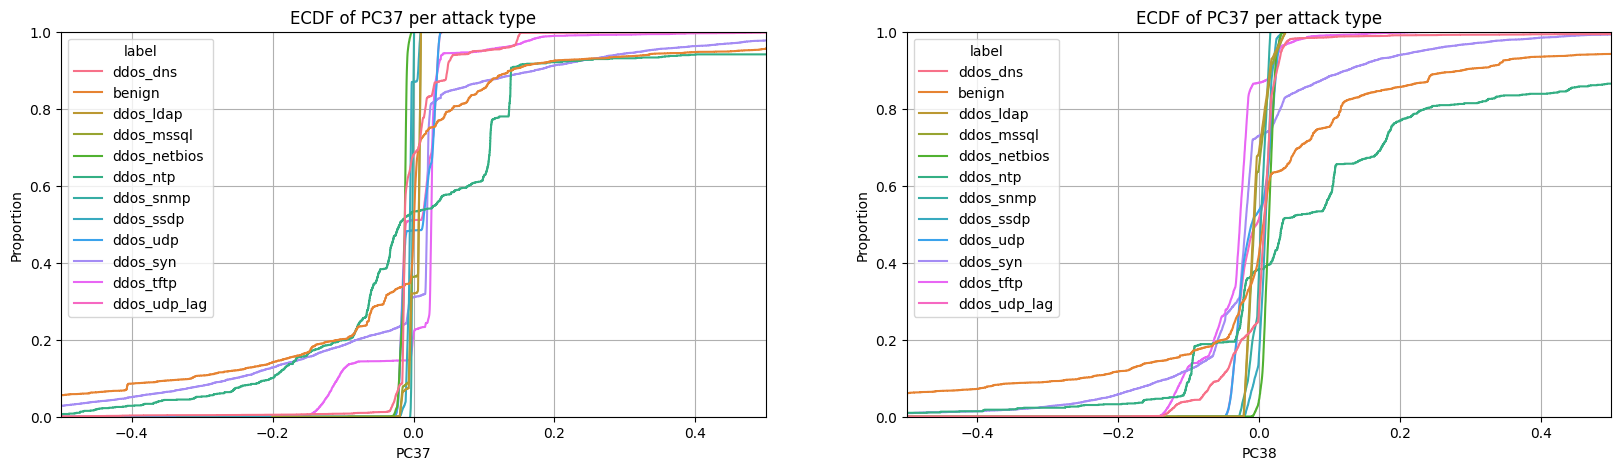

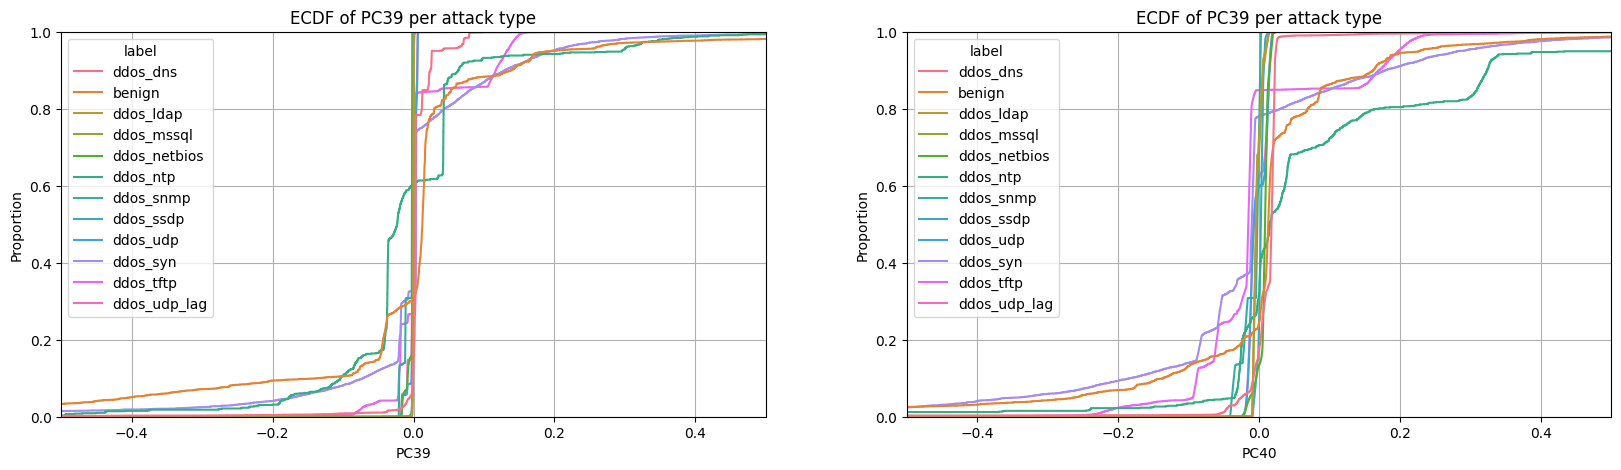

In [14]:
# ECDF of PCA feature per attack type

for i in range(1, PC_number+1, 2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    sns.ecdfplot(data=df_pca_result, x=f'PC{i}', hue='label', ax = axes[0])
    sns.ecdfplot(data=df_pca_result, x=f'PC{i+1}', hue='label', ax = axes[1])
    axes[0].set_xlabel(f'PC{i}')
    axes[1].set_xlabel(f'PC{i+1}')
    axes[0].set_ylabel('Proportion')
    axes[1].set_ylabel('Proportion')
    axes[0].set_title(f'ECDF of PC{i} per attack type')
    axes[1].set_title(f'ECDF of PC{i} per attack type')
    if i < 15:
        axes[0].set_xlim(-5,5)
        axes[1].set_xlim(-5,5)
    elif i < 35:
        axes[0].set_xlim(-2,2)
        axes[1].set_xlim(-2,2)
    else:
        axes[0].set_xlim(-0.5,0.5)
        axes[1].set_xlim(-0.5,0.5)
    axes[0].grid()
    axes[1].grid()
    plt.show()

### Dimensionality reduction
PCA is a great way to do dimensionality reduction, obtaining a certain number of uncorrelated features. However, it has a big disadvantage, since it reduces the explainability of our results. For this reason, here we perform dimensionality reduction simply removing highly correlated features. 

In [15]:
# Scale data
scaler = StandardScaler()
columns = df_cleaned.columns
df_scaled = df_cleaned.copy()

for col in columns:
    # fit the scaler on the data
    scaler.fit(df_cleaned[col].values.reshape(-1, 1))
    # transform the data
    df_scaled[col] = scaler.transform(df_cleaned[col].values.reshape(-1, 1))

correlation_matrix = df_scaled.corr().abs()
c = correlation_matrix[correlation_matrix > 0.8]
s = c.unstack()
so = s.sort_values(ascending=False).reset_index()

# get strongly correlated features removing pairs having correlation = 1 because of the diagonal, i.e., correlation between one feature and itself
so = so[(so[0].isnull()==False) & (so["level_0"] != so["level_1"])]
to_be_deleted = []
candidates = list(so["level_0"])

# get the unique set of features to be deleted. Notice that we discard one feature per time considering the case where a feature is strongly correlated with multiple features
subset_so = so
for candidate in candidates:
    if (candidate in list(subset_so["level_0"])):
        to_be_deleted.append(candidate)
        subset_so = subset_so[(subset_so["level_0"] != candidate) & (subset_so["level_1"] != candidate)]

# to_be_deleted contains the index of columns that you need to remove from both training and test sets
print("Cleaned dataset")
print(len(to_be_deleted), 'features are removed:', sorted(to_be_deleted))
print(len(df_scaled.columns) - len(to_be_deleted), 'features are kept.')

preprocessed_df = df_scaled.drop(to_be_deleted, axis=1)

preprocessed_df1 = pd.concat([preprocessed_df, labels], axis=1)
preprocessed_df1.to_csv("preprocessed_dataset.csv")

preprocessed_df


Cleaned dataset
36 features are removed: ['Active Mean', 'Active Std', 'Average Packet Size', 'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'Bwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Destination IP', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Std', 'Flow Packets/s', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Total', 'Fwd PSH Flags', 'Fwd Packet Length Mean', 'Fwd Packet Length Min', 'Idle Max', 'Idle Mean', 'Min Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Total Backward Packets', 'Total Length of Bwd Packets', 'Total Length of Fwd Packets', 'URG Flag Count', 'protocol_17', 'protocol_6']
29 features are kept.


Source IP  Source Port  Destination Port  Total Fwd Packets  \
0      -0.036507    -0.996890          1.463534           0.169121   
1       1.464073    -0.996890          1.463534          -0.036372   
2      -0.036507    -0.996890          0.770389           0.391920   
3      -0.036507    -0.996890         -0.924976           0.391920   
4      -0.036507    -0.996890         -0.139438           0.391920   
...          ...          ...               ...                ...   
65995  -0.036507     0.540571          1.589149          -0.036372   
65996  -0.036507     1.350236         -0.577568          -0.027720   
65997  -0.036507     0.843239          1.670387          -0.036372   
65998  -0.036507     1.433360         -0.996433          -0.032046   
65999  -0.036507     0.822924         -1.441345          -0.036372   

       Fwd Packet Length Max  Fwd Packet Length Std  Bwd Packet Length Max  \
0                  -0.297075              -0.172277              -0.069596   
1                  -0.297075              -0.172277              -0.069596   
2                  -0.297075              -0.172277              -0.069596   
3                  -0.297075              -0.172277              -0.069596   
4                  -0.297075              -0.172277              -0.069596   
...                      ...                    ...                    ...   
65995              -0.408056              -0.172277              -0.069596   
65996              -0.377323               0.521580              -0.069596   
65997              -0.408056              -0.172277              -0.069596   
65998              -0.384152               0.501315              -0.069596   
65999              -0.408056              -0.172277              -0.069596   

       Bwd Packet Length Min  Flow Bytes/s  Fwd IAT Min  Bwd IAT Total  \
0                  -0.146261     -0.765426    -0.014034      -0.112384   
1                  -0.146261     -0.324952    -0.014030      -0.112384   
2                  -0.146261     -0.765114    -0.014034      -0.112384   
3                  -0.146261     -0.765106    -0.014034      -0.112384   
4                  -0.146261     -0.764174    -0.014038      -0.112384   
...                      ...           ...          ...            ...   
65995              -0.146261     -0.013555    -0.014034      -0.112384   
65996              -0.146261     -0.766925    -0.014034      -0.112384   
65997              -0.146261     -0.013555    -0.014034      -0.112384   
65998              -0.146261     -0.766921    -0.014034      -0.112384   
65999              -0.146261     -0.013555    -0.014034      -0.112384   

       Bwd IAT Min  Fwd Packets/s  Bwd Packets/s  Max Packet Length  \
0        -0.113608      -1.147994      -0.044977          -0.229549   
1        -0.113608      -0.042798      -0.044977          -0.229549   
2        -0.113608      -1.147211      -0.044977          -0.229549   
3        -0.113608      -1.147191      -0.044977          -0.229549   
4        -0.113608      -1.144854      -0.044977          -0.229549   
...            ...            ...            ...                ...   
65995    -0.113608       1.066184      -0.044977          -0.300460   
65996    -0.113608      -1.151749      -0.044977          -0.280823   
65997    -0.113608       1.066184      -0.044977          -0.300460   
65998    -0.113608      -1.151739      -0.044977          -0.285187   
65999    -0.113608       1.066184      -0.044977          -0.300460   

       SYN Flag Count  RST Flag Count  ACK Flag Count  CWE Flag Count  \
0           -0.024329       -0.096031       -0.485071        -0.18902   
1           -0.024329       -0.096031       -0.485071        -0.18902   
2           -0.024329       -0.096031       -0.485071        -0.18902   
3           -0.024329       -0.096031       -0.485071        -0.18902   
4           -0.024329       -0.096031       -0.485071        -0.18902   
...               ...             ...            

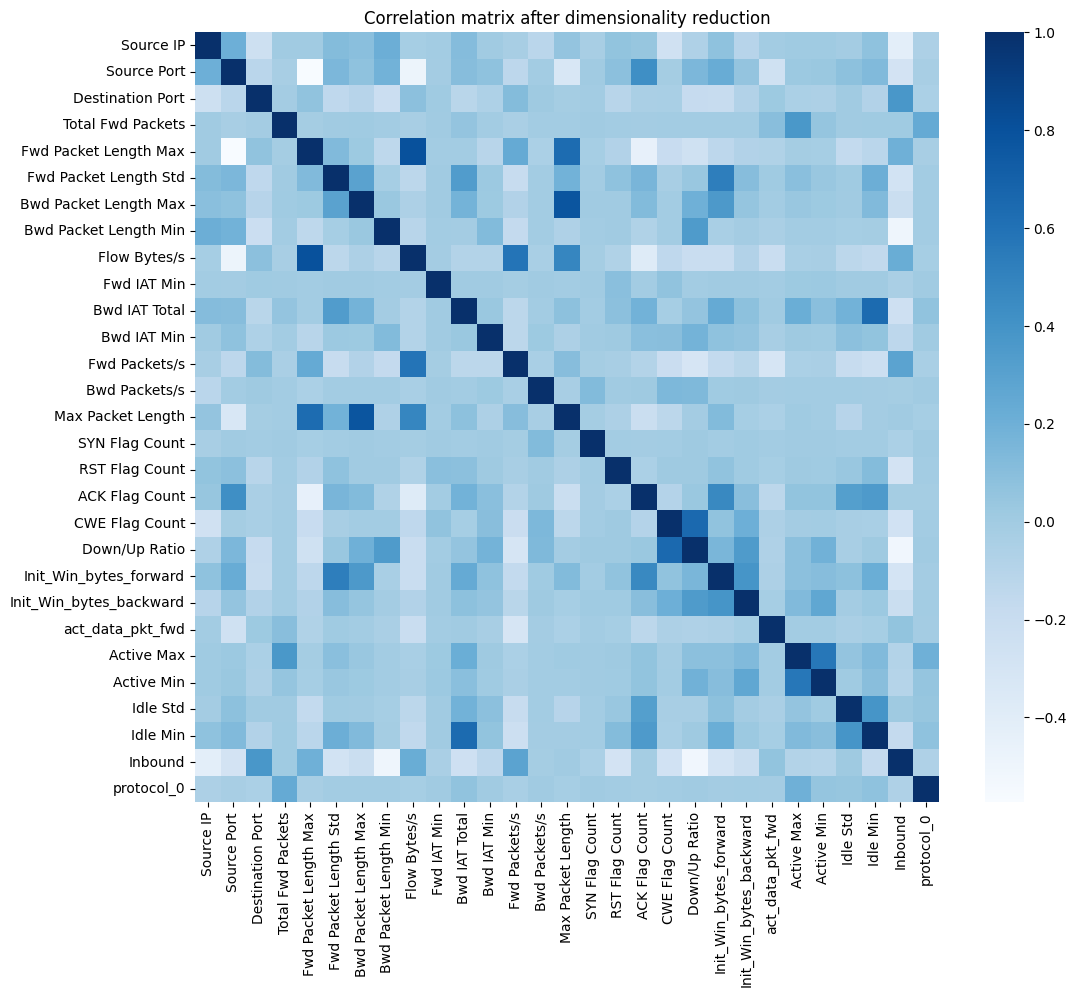

In [16]:
correlation_matrix = preprocessed_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='Blues', annot=False, cbar=True)
plt.title('Correlation matrix after dimensionality reduction')
plt.show()